In [1]:
from IPython.display import Image, display
from IPython.core.display import HTML

image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7ltoZT1furs24vWMk_3cKdicA5rIXxpjo_A&usqp=CAU'
frame_width = 500
frame_height = 500
image_tag = f'<img src="{image_url}" style="width:{frame_width}px; height:{frame_height}px; display: block; margin: 0 auto;">'

display(HTML(image_tag))

# Introduction
> We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
1. [Basic Data Analysis](#3)
    * [Target Review](#4)
    * [Categorical Variable](#5)
    * [Numerical Variable](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
1. [Outlier Detection](#10)
1. [Visualization](#11)
    * [Correlation of Numerical Columns](#12)
    * [Accommodates -- Price](#13)
    * [Bathrooms -- Price](#14)
    * [Number of Reviews -- Price](#15)
    * [Review Scores Rating -- Price](#16)
    * [Bedroom -- Price](#17)
    * [Beds -- Price](#18)
    
1. [Factorization of Categorical Columns](#19)
    * [Propetty Type](#20)
    * [Room Type - Bed Type  - City](#21)
    * [Cleaning Fee - Host Profile Pic. - Host Identity Verified - Instant Bookable  ](#22)
1.  [Feature Engineering](#23)
    * [Amenities](#24)
    * [Host Since](#25)
    * [Neighbourhood Level](#26)
1. [Modeling](#27)
    * [Load Final Data](#28)
    * [Split Data](#29)
    * [Linear Regressor](#30)
    * [Random Forest Regressorn](#31) 
    * [Cat Boost Regressor](#32)
    * [Gradient Boosting Regressor](#33)
    * [XGB Regressor](#34)
    * [Model Comparision](#35)
    * [Metrics Comparision Graphic](#36)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
import re

from scipy import stats
import statsmodels.api as sm
from collections import Counter

# import library for modeling 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,  KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score



import sklearn.metrics as metrics



#tst-train split
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\dell\AppData\Local\Temp\ipykernel_9700\2231637721.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [3]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\info_tech_dersler\\ml_prj_airbnb\\ML_Project_Group_B': ['.git', 'catboost_info', 'Column_description.xlsx', 'data_final.csv', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'usneighborhoods.csv', 'Visualization.ipynb']


In [4]:
df_original = pd.read_csv('train.csv')
df = df_original.copy()

2. <a id = "2"></a><br>
# Variable Description


1. Id: It can be considered as a transaction registration number.

2. log_price: Price per night for rental. (TARGET)

3. property_type: Type of property to be rented.('Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel''Castle' 'Cabin' 'Treehouse'...)

4. room_type: The type of room to be rented. ('Entire home/apt' 'Private room' 'Shared room')

5. amenities: The essential items a guest expects to have a comfortable stay.("Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Smoke detector","Carbon monoxide detector","First aid kit","Safety card"...)

6. accommodates: Number of guests the rental can host. 

7. bathrooms:The number of bathroom found in the accommodation

8. bed_type: The type of bed found in the accommodation.(Real Bed, Futon, Pull-out Sofa, Couch, Airbed) 

9. cancellation_policy: Determines the amount of refund a guest will receive if they cancel their reservation. (strict, moderate, flexible, super_strict_30, super_strict_60)

10. cleaning_fee: Fee for cleaning the area you are staying in. (True, False)

11. city: Cities where the facility is located.(NYC, SF, DC, LA, Chicago, Boston)  

12. description: Detailed description of the space, usually including the room's features, amenities, location, and any special considerations or rules guests should be aware of.

13. first_review: Date of first feedback a guest leaves after staying at a particular property.

14. host_has_profile_pic: Whether the host has a profile picture (True, False)

15. host_identity_verified: Whether the host's identity has been confirmed. (True, False)

16. host_response_rate: Percentage of replies to host messages within a given time frame.

17. host_since: The date a host joined Airbnb and started using their property on the platform.

18. instant_bookable: Allows guests to book listings without having to wait for host's approval. (True, False)

19. last_review: The date when a guest last left feedback about their stay at that property.

20. latitude: Latitude value of the location of the facility.

21. longitude: Longtitude value of the location of the facility.

22. name: A descriptive or catchy headline that hosts use to attract guests.

23. neighbourhood: The specific district or district in which a property is located.

24. number_of_reviews: Represents the total number of reviews posted by guests staying at the property.

25. review_scores_rating: Value that represents the overall rating or evaluation given by guests to a host or accommodation. 

26. thumbnail_url: A web link address that points to a thumbnail image of a record.

27. zipcode: Zip code of the place where the accommodation is located

28. bedrooms: The number of separate bedrooms available to guests.

29. beds: The number of beds included in the rental

3. <a id = "3"></a><br>
# Basic Data Analysis


In [5]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [7]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [8]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [9]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Duplicated"] = df.duplicated().sum()
summary["Missing"] = df.isnull().sum()
summary["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

,Unique,Duplicated,Missing,Missing Percentage,Types
id,74111,0,0,0.000000,int64
log_price,767,0,0,0.000000,float64
property_type,35,0,0,0.000000,object
room_type,3,0,0,0.000000,object
amenities,67122,0,0,0.000000,object
accommodates,16,0,0,0.000000,int64
bathrooms,17,0,200,0.269865,float64
bed_type,5,0,0,0.000000,object
cancellation_policy,5,0,0,0.000000,object
cleaning_fee,2,0,0,0.000000,bool


> We will consider preserving columns with missing value rates higher than 20% instead of deleting them, as we believe it is a more appropriate approach to maintain data integrity, consider important dependencies, handle missing data, and preserve the sample size.

In [10]:
df.drop(columns='id', inplace=True)

> The id column gives each data sample a unique ID value and has been deleted as it may affect the generalizability of the model.

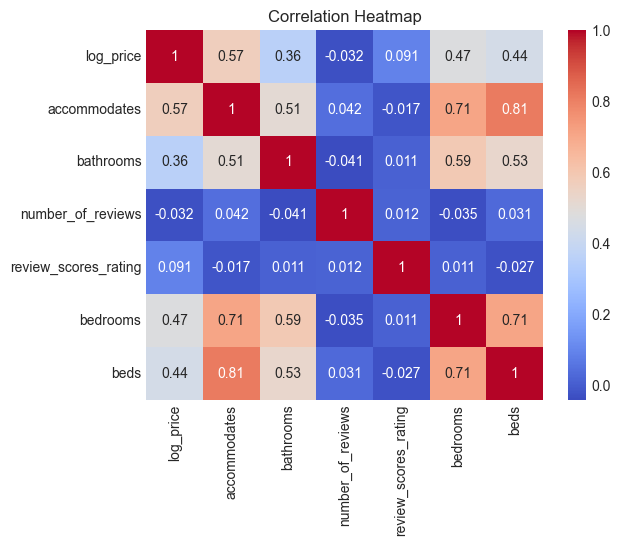

In [11]:
df_numeric = df.select_dtypes(include='number').drop(columns=['latitude', 'longitude'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
numerical_columns = df.select_dtypes(include='number').drop(columns=['latitude', 'longitude'])
target_correlation = numerical_columns.corr()['log_price'].abs().sort_values(ascending=False)

target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
number_of_reviews       0.032470
Name: log_price, dtype: float64

> We can interpret these results as follows:

> 1- There is a moderate positive correlation between "accommodates", "bedrooms" and "beds" and "log_price". This usually means that as the house's capacity for accommodation (including the number of bedrooms and beds) increases, so does the price.

> 2- There is also a positive correlation between "bathrooms" and "log_price", but not as strong as "accommodates" and other bedroom/bathroom features.

> 3- Correlations between "review_scores_rating" and "number_of_reviews" are quite low. The direct relationship of these variables to "log_price" is very weak or almost non-existent.

<a id = "4"></a><br>
## Target Review

In [13]:
target = df['log_price']
df['price'] = np.exp(target)
df['price']

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: price, Length: 74111, dtype: float64

> Using the np.exc() function, the inverse of the logarithmic transformation is applied for the log_price column.
Purpose: to reach the original target and examine it

outlierlari handle etmeden önce...df_original
count    74111.000000
mean       160.370849
std        168.580415
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max       1999.000000

iqr  metodu ile outlierslari upper_limit ve lower limite baskilama sonrasi (5726 satirda outlier tespit edildi).........df

count    74111.000000
mean       140.458893
std         89.894990
min          1.000000
25%         75.000000
50%        111.000000
75%        185.000000
max        350.000000


z skoru sonrasi (1593 satir outlier cikti)...df2
count    74111.000000
mean       142.086111
std        102.636085
min          1.000000
25%         75.000000
50%        111.000000
75%        175.000000
max        662.000000


iqr ile outlierlari bulup median ile doldurursak....df3
count    74111.000000
mean       121.143272
std         66.648622
min          1.000000
25%         75.000000
50%        100.000000
75%        150.000000
max        349.000000


burada karsimiza cikan tablodan z skorla outlierlari handle etmek mantikli olacaktir.iqr ile baskilama yonteminde ust sinirda 350 degerinde cok buyuk bir yigilma goze carpiyor.ayni zamanda outlier grafigine baktigimizda max degerin 2000 degerinden 600 e dustugunu gozlemliyoruz.son olarak logaritmik dönusum yaptigimizda da dagilimin normal dagilima daha yakin oldugunu gözlemliyoruz.
bu nedenlerle son kararimiz z skor ile outlierlari handle etmek 

In [14]:
# We are taking only the 'price' column
price_column = df['price']

# Calculating mean and standard deviation for the 'price' column to compute Z-scores
price_mean = price_column.mean()
price_std = price_column.std()

# Calculating Z-scores
z_scores = (price_column - price_mean) / price_std

# Set the threshold for identifying outliers
z_score_threshold = 3  # defining the threshold value

# Replacing outliers with the mean value
outliers_count = np.sum(z_scores.abs() > z_score_threshold)
price_column = np.where(z_scores.abs() > z_score_threshold, price_mean, price_column)

# Adding the modified 'price' column back to the dataset
df['price'] = price_column

# Displaying the modified 'price' column and the number of outliers
print("Modified 'price' column:")
print(df['price'])

print("Number of outliers:", outliers_count)


Değiştirilmiş 'price' sütunu:
0        150.000000
1        169.000000
2        145.000000
3        160.370849
4        115.000000
            ...    
74106    100.000000
74107    155.000000
74108    185.000000
74109    195.000000
74110    128.000000
Name: price, Length: 74111, dtype: float64
Aykırı değerlerin sayısı: 1593


In [15]:
df['price'].describe()

count    74111.000000
mean       142.086111
std        102.636085
min          1.000000
25%         75.000000
50%        111.000000
75%        175.000000
max        662.000000
Name: price, dtype: float64

In [16]:
df1=df_original.copy()

In [17]:
# Exponential transformation (Inverse of logarithmic transformation)
df1['price'] = np.exp(df1['log_price'])
print(df1['price'])

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: price, Length: 74111, dtype: float64


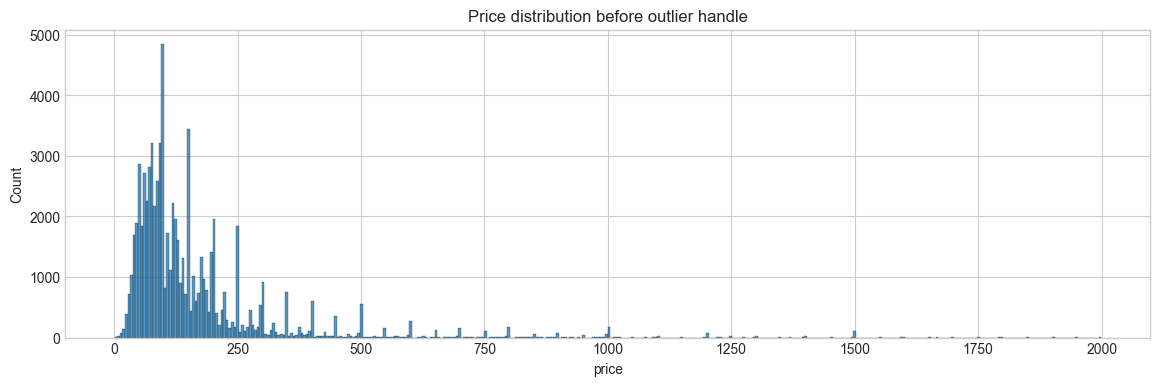

In [20]:

plt.figure(figsize = (14, 4))
sns.histplot(df1["price"])
plt.title('Price distribution before outlier handle')
plt.show()

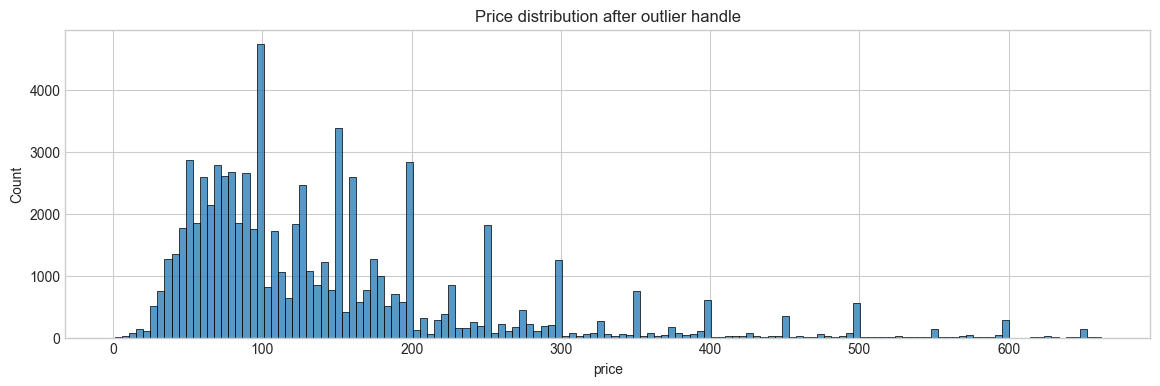

In [21]:
plt.figure(figsize = (14, 4))
sns.histplot(df["price"])
plt.title('Price distribution after outlier handle')
plt.show()

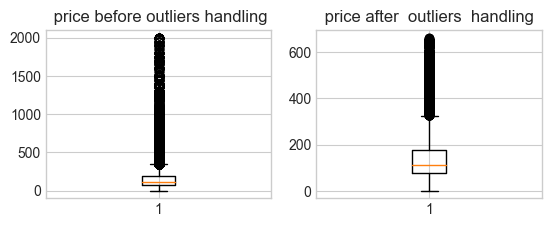

In [22]:
# Displaying the price column with a box plot
plt.figure()
plt.subplot(2, 2, 1)
plt.boxplot(df1['price'])
plt.title(f" {'price'} before outliers handling")

plt.subplot(2, 2, 2)
plt.boxplot(df['price'])
plt.title(f" {'price'} after  outliers  handling ")

plt.show()

In [24]:
## Normality Test -price-
# Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = stats.shapiro(df['price'])
shapiro_normal = shapiro_pvalue > 0.05
print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")

Shapiro-Wilk test - Normal: False


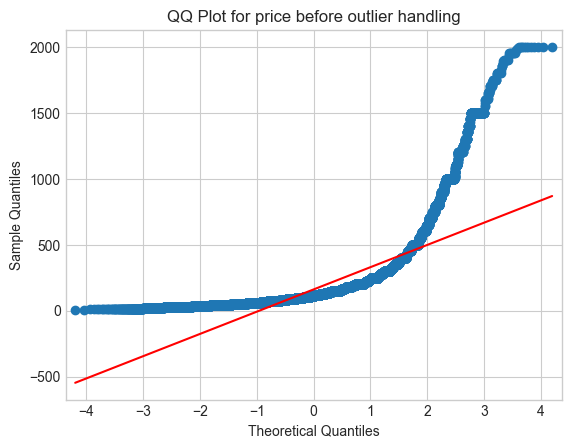

In [25]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df1['price'], line='s')
plt.title(f"QQ Plot for {'price'} before outlier handling")
plt.show()

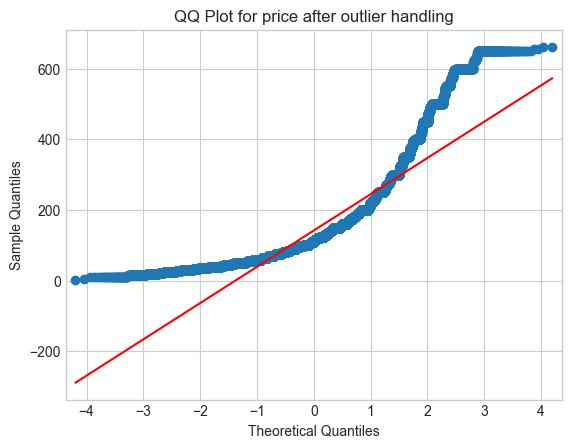

In [26]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df['price'], line='s')
plt.title(f"QQ Plot for {'price'} after outlier handling")
plt.show()

## Transformation price

!!
clarification: Outliers of the price column have not been handled yet. but we wanted to see the transformation of the column. will be rearranged after outliers are decided


Text(0.5, 1.0, 'power_price in Power Transformation')

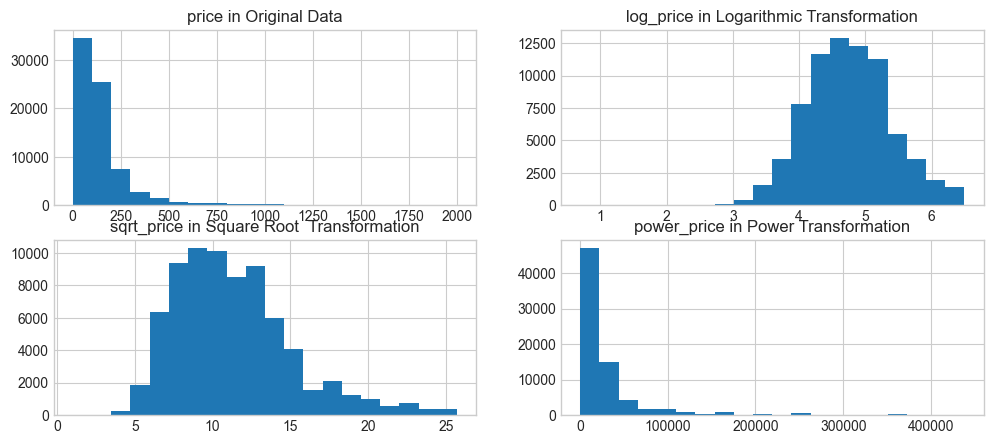

In [27]:
log_price = df['price']
log_transformed_df = np.log1p(log_price)

sqrt_price = df['price']
sqrt_transformed_df = np.sqrt(sqrt_price)

power_price = df['price']
power_transformed_df = np.power(power_price, 2)

plt.figure(figsize=(12, 5))
#log transformation
plt.subplot(2, 2, 1)
plt.hist(df1['price'], bins=20)
plt.title('price in Original Data')
plt.subplot(2, 2, 2)
plt.hist(log_transformed_df, bins=20)
plt.title(f'log_price in Logarithmic Transformation')
#Square Root Transformation
plt.subplot(2, 2, 3)
plt.hist(sqrt_transformed_df, bins=20)
plt.title(f'sqrt_price in Square Root  Transformation')
#Power Transformation
plt.subplot(2, 2, 4)
plt.hist(power_transformed_df, bins=20)
plt.title(f'power_price in Power Transformation')

> As can be seen from the graph, the best option is Logarithmic Transformation

In [28]:
# Perform the logarithmic transformation using np.log1p() function on the 'price' column
df['log_price_new'] = np.log1p(df['price'])

# Add the 'log_price_new' column to the DataFrame and display the result
print(df[['price', 'log_price_new']])

            price  log_price_new
0      150.000000       5.017280
1      169.000000       5.135798
2      145.000000       4.983607
3      160.370849       5.083705
4      115.000000       4.753590
...           ...            ...
74106  100.000000       4.615121
74107  155.000000       5.049856
74108  185.000000       5.225747
74109  195.000000       5.278115
74110  128.000000       4.859812

[74111 rows x 2 columns]


In [29]:
df[['log_price','log_price_new']]

,log_price,log_price_new
0,5.010635,5.017280
1,5.129899,5.135798
2,4.976734,4.983607
3,6.620073,5.083705
4,4.744932,4.753590
...,...,...
74106,4.605170,4.615121
74107,5.043425,5.049856
74108,5.220356,5.225747
74109,5.273000,5.278115


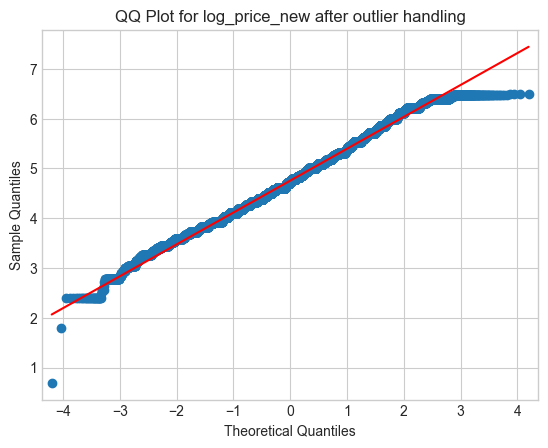

In [30]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df['log_price_new'], line='s')
plt.title(f"QQ Plot for {'log_price_new'} after outlier handling")
plt.show()

<a id = "5"></a><br>
## Categorical Variable

In [31]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

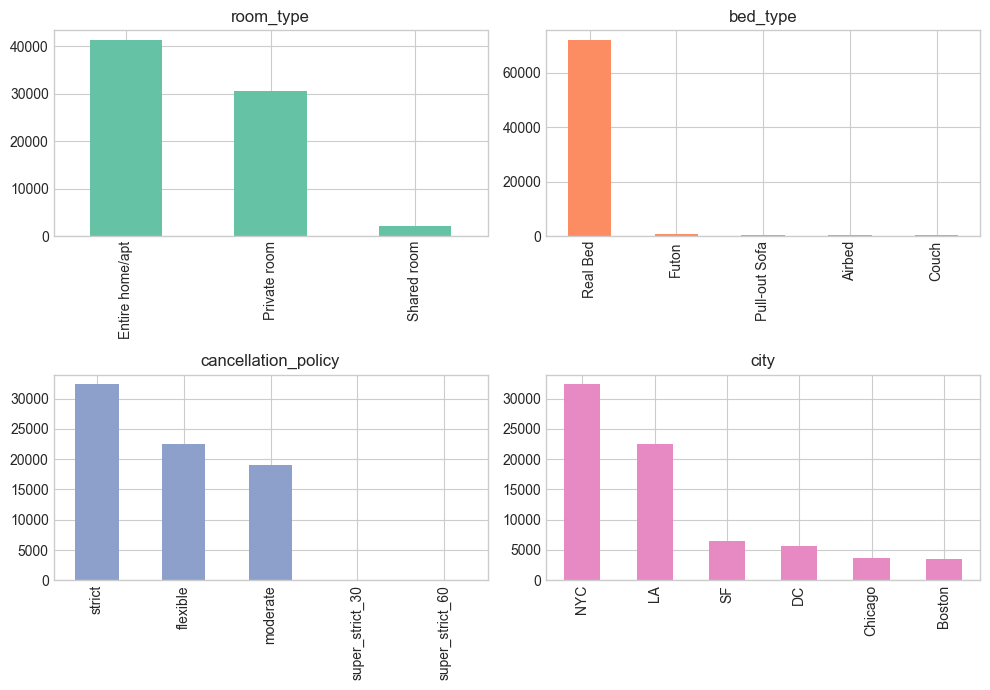

In [32]:
plt.figure(figsize=(10, 7))

columns = ['room_type', 'bed_type', 'cancellation_policy', 'city']
colors = sns.color_palette('Set2', len(columns)) 

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    df[column].value_counts().plot(kind='bar', title=column, color=colors[i])
    plt.xlabel('')

plt.tight_layout()
plt.show()

<a id = "6"></a><br>
## Numerical Variable

In [33]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'price', 'log_price_new'],
      dtype='object')

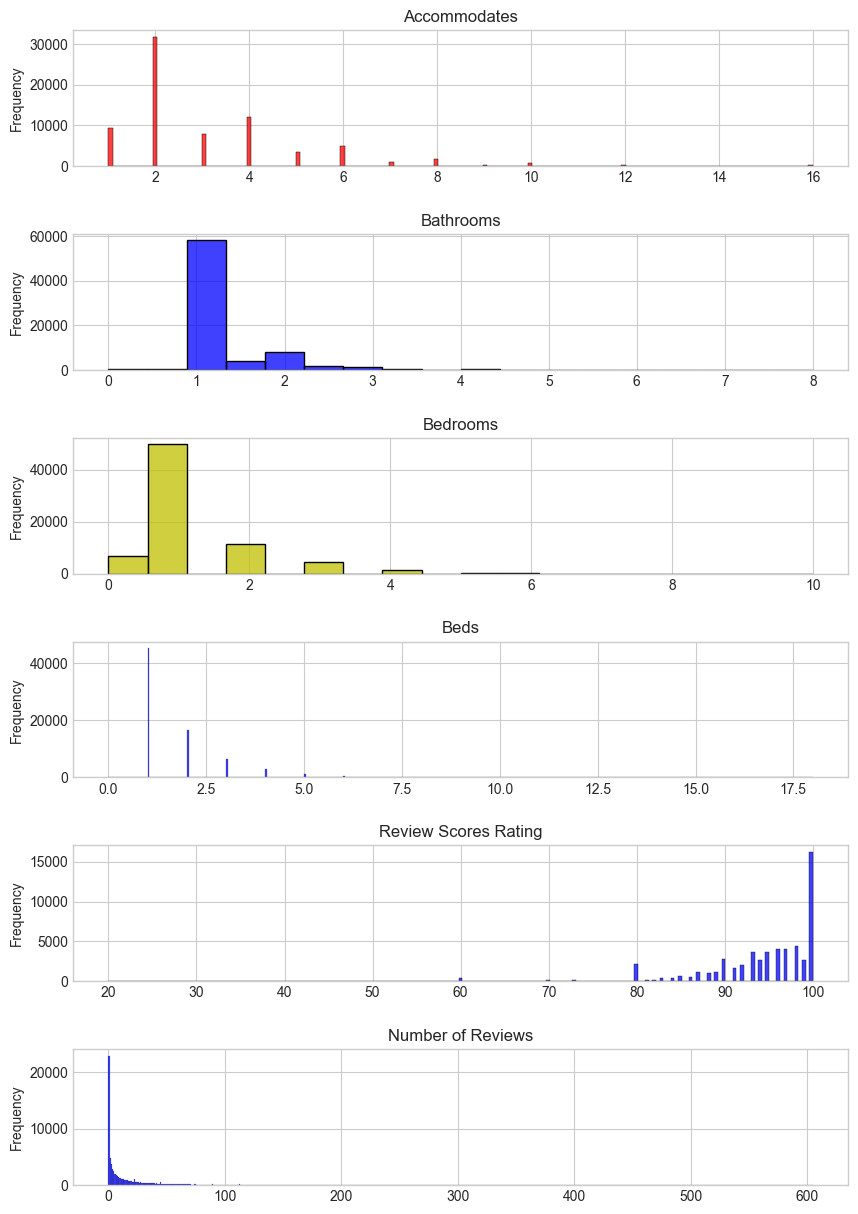

In [34]:
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
colors = ['r', 'b', 'y', 'b', 'b', 'b']
titles = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating', 'Number of Reviews']

for i in range(len(columns)):
    sns.histplot(df[columns[i]], color=colors[i], ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.show()

4. <a id = "7"></a><br>
# Missing Value

<a id = "8"></a><br>
## Find Missing Value

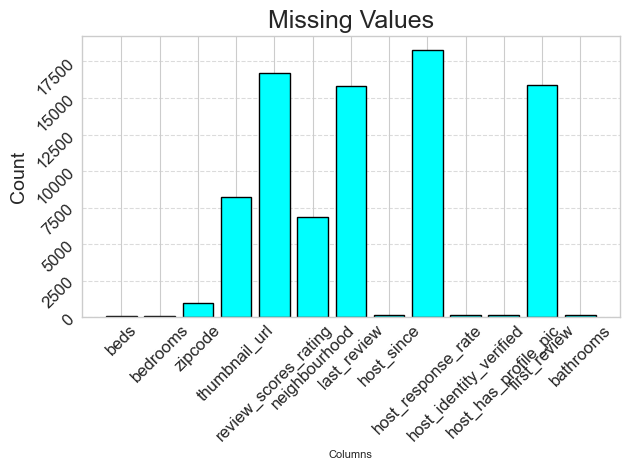

In [35]:
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a vertical bar chart to show missing values
plt.bar(missing_values.index, missing_values.values, color='cyan', edgecolor='black')

# Customize the chart
plt.title('Missing Values', fontsize=18)
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, rotation=45)  # Rotate the x-axis labels for better visibility
plt.gca().invert_xaxis()  # Display bars from right to left
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines

# Show the plot
plt.tight_layout()
plt.show()

<a id = "9"></a><br>
## Fill Missing Value

* bathrooms

In [36]:
filtered_bath = df[(df['description'].str.contains('bathroom', na=False)) & (df['bathrooms'].isna())]

In [37]:
def convert_bathroom_description(description):
    #if ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
    #    return 1
    if ("two bathrooms") or  ('2 bathrooms') in description.lower():
        return 2
    elif '3 bathrooms' in description.lower():
        return 3
    elif '4 bathrooms' in description.lower():
        return 4 
    elif ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
        return 1
    else:
        #return 1
        return None

# Print the results from the "filtered_bath" DataFrame as numeric values in the "bathrooms" column
df.loc[filtered_bath.index, 'bathrooms'] = filtered_bath['description'].apply(convert_bathroom_description)

In [38]:
df['bathrooms'] = df['bathrooms'].fillna(1)

* bedrooms

In [39]:
import numpy as np

keywords = ['one bedroom', 'bedroom', 'two bedrooms', 'bedrooms']

# Filter rows where the 'description' column contains the keywords and the 'bedrooms' column is NaN
filtered_data = df[(df['description'].str.contains('|'.join(keywords), na=False)) & (df['bedrooms'].isna())]

'''# Fill the 'bedrooms' column with 1 for specific 'id' values
ids = filtered_data['id'].tolist()  # Get the id values from the filtered dataset
df.loc[df['id'].isin(ids), 'bedrooms'] = df.loc[df['id'].isin(ids), 'bedrooms'].fillna(1)'''

# Get the number of observations in the filtered dataset
num_rows = len(filtered_data)
print("Number of observations in the filtered dataset:", num_rows)

Number of observations in the filtered dataset: 8


The purpose of this code is to filter rows that have specific keywords in the 'description' column and empty 'bedrooms' values. It then updates the 'bedrooms' column for these filtered rows to 1 and prints the number of observations in the filtered dataset.

In [40]:
df["bedrooms"] = df['bedrooms'].fillna((df["bedrooms"].mean()))

* thumbnail_url

In [41]:
# We fill the filled values with 1 and the empty values with 0 in the thumbnail_url column.
df['thumbnail_url'] = df['thumbnail_url'].apply(lambda x: 1 if pd.notna(x) else 0)

* zipcode

In [42]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [43]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807776


In [1518]:
#pip install uszipcode    # installing Library to find zip code from latitude and longitude information using us zip code
from uszipcode import SearchEngine

search = SearchEngine()
zipcodes = []
for index, row in df.iterrows():
    latitude = row['latitude']  # Latitude 
    longitude = row['longitude']  # Longitude 

    result = search.by_coordinates(latitude, longitude)
    if result:
        zipcode = result[0].zipcode
        zipcodes.append(zipcode)
    else:
        zipcodes.append(None)  # None if postal code not found or incorrect

df['Zipcode'] = zipcodes  # Adds a new Zipcode column

In [1519]:
df[['Zipcode','zipcode']].head(5)   #comparing two columns for first observation

,Zipcode,zipcode
0,11201,11201.0
1,10019,10019.0
2,10037,10027.0
3,94115,94117.0
4,20010,20009.0


In [1520]:
filtered_zip =df[df['Zipcode'].isna()][['neighbourhood','city','latitude','zipcode']]
print(filtered_zip)

      neighbourhood city   latitude  zipcode
2461            NaN   LA  33.343574  90704.0
4317            NaN   LA  33.339327  90704.0
18396           NaN   LA  33.343624  90704.0
26402           NaN   LA  33.343287  90704.0
27138           NaN   LA  33.354491  90704.0
27310           NaN   LA  33.353834  90704.0
31296           NaN   LA  33.345148  90704.0
42232           NaN   LA  33.338905  90704.0
44131           NaN   LA  33.340521  90704.0
46773           NaN   LA  33.352373  90704.0
59902           NaN   LA  33.339007  90704.0
63200           NaN   LA  33.339002  90704.0
64969           NaN   LA  33.340916  90704.0
69934           NaN   LA  33.343011  90704.0


In [1521]:
df = df.drop(filtered_zip.index)

* Neighbourhood

In [1522]:
#df['neighbourhood']=df_original['neighbourhood'].copy()
df['city']=df_original['city'].copy()

from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
# taking zipcodes
zipcodes = df['Zipcode']
#print(zipcodes)

The method of imputing missing values is used. By using the values in the City and Zip code columns, the neighborhood column has been imputed and the number of missing values has been reduced to 1864.

In [1523]:

#Fill in missing values by matching `city` and `Zipcode` columns
df['neighbourhood'] = df.apply(lambda row: df.loc[(df['city'] == row['city']) & (df['Zipcode'] == row['Zipcode']), 'neighbourhood'].values[0] if pd.isnull(row['neighbourhood']) else row['neighbourhood'], axis=1)

# printing results
#print(df[['neighbourhood', 'Zipcode', 'city']])


* Neighbour sütununu başka data setinden doldurma

In [1524]:
usneighborhoods_df = pd.read_csv('usneighborhoods.csv')

# 1. Finding empty values in the neighborhood column in airbnb data
missing_neighbourhoods = df[df['neighbourhood'].isnull()]

## Searching the usneighborhoods data for nulls found using their zipcodes
for index, row in missing_neighbourhoods.iterrows():
    zipcode = row['zipcode']
    matching_neighbour = usneighborhoods_df[usneighborhoods_df['zipcode'] == zipcode]['neighbor'].values
    
    #  Fill in the empty neighbor column in the airbnb data if a matching neighbor is found
    if len(matching_neighbour) > 0:
        df.at[index, 'neighbourhood'] = matching_neighbour[0]
## Searching the usneighborhoods data for nulls found using their Zipcode column
for index, row in missing_neighbourhoods.iterrows():
    zipcode = row['Zipcode']
    matching_neighbour = usneighborhoods_df[usneighborhoods_df['zipcode'] == zipcode]['neighbor'].values
    
    # Fill in the empty neighbor column in the airbnb data if a matching neighbor is found
    if len(matching_neighbour) > 0:
        df.at[index, 'neighbourhood'] = matching_neighbour[0]

# result
print(df[['neighbourhood', 'Zipcode', 'latitude', 'longitude']])


          neighbourhood Zipcode   latitude   longitude
0      Brooklyn Heights   11201  40.696524  -73.991617
1        Hell's Kitchen   10019  40.766115  -73.989040
2                Harlem   10037  40.808110  -73.943756
3          Lower Haight   94115  37.772004 -122.431619
4      Columbia Heights   20010  38.925627  -77.034596
...                 ...     ...        ...         ...
74106      Williamsburg   11211  40.709025  -73.939405
74107     Hermosa Beach   90266  33.871549 -118.396053
74108      Williamsburg   11211  40.706749  -73.942377
74109      West Village   10011  40.738535  -74.000157
74110        Long Beach   90833  33.761096 -118.192409

[74097 rows x 4 columns]


In [1525]:
df=df.dropna(subset=['neighbourhood'])

* host_response_rate

In [1526]:
df.host_response_rate = df.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

* first_review

In [1527]:
def fill_missing_first_review_by_city(df):
    # Convert "host_since" and "first_review" columns to date data type.
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['first_review'] = pd.to_datetime(df['first_review'])
    
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['first_review'] - filtered_df['host_since']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'first_review'] = df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'host_since'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_first_review_by_city(df)


In [1528]:
df['first_review'].isnull().sum()

42

In [1529]:
pd.set_option('display.max_rows', 50)
df[['first_review','last_review']]

,first_review,last_review
0,2016-06-18,2016-07-18
1,2017-08-05,2017-09-23
2,2017-04-30,2017-09-14
3,2017-02-28,NaN
4,2015-05-12,2017-01-22
...,...,...
74106,2014-11-21,NaN
74107,2016-08-15,2017-04-15
74108,2015-01-03,2017-09-10
74109,2019-05-17,NaN


* last_review

In [1530]:
#check with first review 
nan_rows = df[df['first_review'].isnull()]
nan_last_review_count = np.sum(nan_rows['last_review'].isnull())
nan_last_review_count
# We detected that the values that are Nan in the last review are Nan in the first review values.

36

In [1531]:
df.last_review.fillna(method="ffill",inplace=True)

* host_since

In [1532]:
# Filters empty values in column 'host_since'
filtered_since = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_since =  filtered_since[filtered_since['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_since[['first_review', 'host_has_profile_pic', 'host_identity_verified']]

In [1533]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_since.index)

In [1534]:
def fill_missing_host_since_by_city(df):
  
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['host_since'] - filtered_df['first_review']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['host_since'].isnull()), 'host_since'] = df.loc[(df['city'] == city) & (df['host_since'].isnull()), 'first_review'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_host_since_by_city(df)

In [1535]:
df['host_since'].isnull().sum()

42

* review_scores_rating

In [1536]:
# The "number_of_reviews" column values are directly related to the values in the "review_scores_rating" column
filtered_review = df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]
filtered_review

,number_of_reviews,review_scores_rating
3,0,NaN
12,0,NaN
15,0,NaN
24,0,NaN
31,0,NaN
...,...,...
74083,0,NaN
74089,0,NaN
74095,0,NaN
74106,0,NaN


In [1537]:
# We compared the Nan-valued rows of the "review_scores_rating" column with the 0 values of the "number_of_reviews" column. 
# If the value is 0, we set the Nan value to 0.
zero_reviews_nan_scores = df[(df['number_of_reviews'] == 0) & (df['review_scores_rating'].isnull())]
df.loc[zero_reviews_nan_scores.index, 'review_scores_rating'] = 0

In [1538]:
#filled the remaining missing values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

In [1539]:
df['review_scores_rating'].isnull().sum()

0

* beds

In [1540]:
#The number of beds is directly related to the bedroom and bed_type column.
result = df.loc[df['beds'].isnull(), 'bed_type'].value_counts() # values of empty beds, bed_types
result

bed_type
Real Bed         122
Pull-out Sofa      2
Name: count, dtype: int64

In [1541]:
## the values of the empty beds, the bedrooms values
result = df.loc[df['beds'].isnull(), 'bedrooms'].value_counts()
result 

bedrooms
1.000000    85
1.265793    28
0.000000     4
2.000000     4
4.000000     2
3.000000     1
Name: count, dtype: int64

In [1542]:
# We filled the empty beds with 1, those whose bedroms value is empty and 1, and those whose bed_type value is Real Bed. 
# We completed the remaining empty values with the value of bedrooms.
df.loc[((df['beds'].isnull()) | (df['beds'] == 0)) & (df['bedrooms'] == 1) & (df['bed_type'] == 'Real Bed'), 'beds'] = 1
df.loc[df['beds'].isnull(), 'beds'] = df['bedrooms']

5. <a id = "10"></a><br>
# Outlier Detection

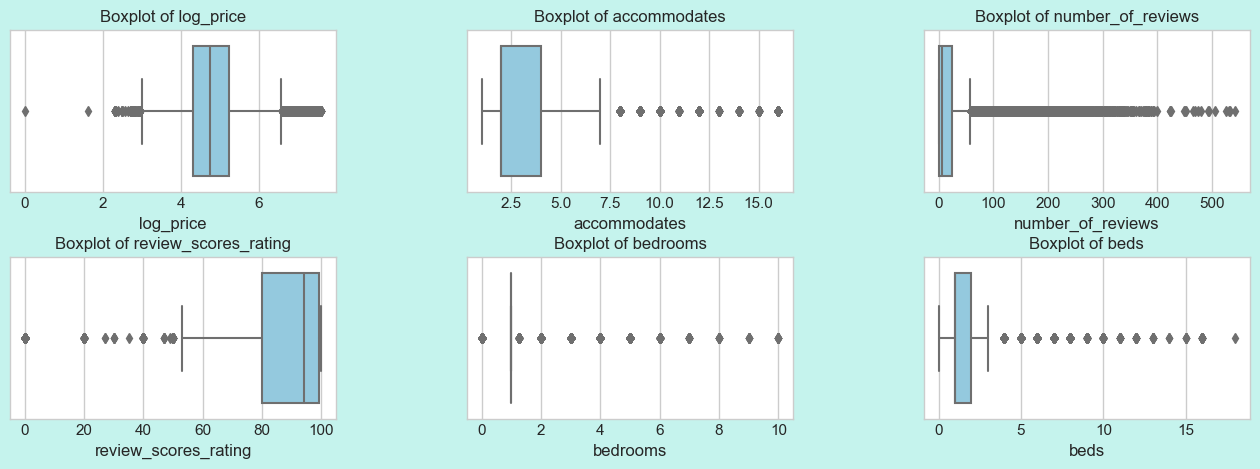

In [1543]:
# Columns where we want to find outliers
outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

fig = plt.figure(facecolor='#C5F3ED', figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Let's loop the columns and draw the boxplot
for num, column_name in enumerate(outliers_columns, start=1):
    ax = fig.add_subplot(3, 3, num)
    sns.boxplot(x=df[column_name], color='skyblue', ax=ax)
    ax.set_title(f"Boxplot of {column_name}")

plt.show()

In [1544]:
def find_column_outliers(df, column_name):
    column = df[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

for column_name in outliers_columns:
    outliers = find_column_outliers(df, column_name)
    print(f"Outliers in '{column_name}':")
    print(outliers)
    print("===")

Outliers in 'log_price':
3        6.620073
24       6.956545
52       6.620073
62       6.907755
148      7.150701
           ...   
73939    6.731018
73953    6.829794
73957    6.684612
74031    6.907755
74081    6.907755
Name: log_price, Length: 1484, dtype: float64
===
Outliers in 'accommodates':
19        8
42        8
62        9
104       9
109       9
         ..
74031     8
74032    10
74042     8
74081    16
74102    10
Name: accommodates, Length: 3452, dtype: int64
===
Outliers in 'number_of_reviews':
8        159
10        82
22        73
32       248
36       138
        ... 
74026     76
74037    158
74057     89
74082     60
74110    205
Name: number_of_reviews, Length: 7726, dtype: int64
===
Outliers in 'review_scores_rating':
3         0.0
4        40.0
12        0.0
15        0.0
24        0.0
         ... 
74083     0.0
74089     0.0
74095     0.0
74106     0.0
74109     0.0
Name: review_scores_rating, Length: 15529, dtype: float64
===
Outliers in 'bedrooms':
1       

We tried the IQR (Interquartile Range) Method, Winsorizing Method, Robust Scaling and Capping and Flooring methods, which are the methods of processing outliers on our data. We chose the most suitable IQR (Interquartile Range) Method to better analyze our data.

In [1545]:
# Let's set the lower and upper percentiles to handle outliers
lower_limit = 0.05
upper_limit = 0.95

outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

def handle_outliers(df, column_name, lower_limit, upper_limit):
    column = df[column_name]
    Q1 = column.quantile(lower_limit)
    Q3 = column.quantile(upper_limit)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

# Deal with outliers
for column_name in outliers_columns:
    handle_outliers(df, column_name, lower_limit, upper_limit)

# show the updated dataframe
print(df)

       log_price property_type        room_type   
0       5.010635     Apartment  Entire home/apt  \
1       5.129899     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
3       6.620073         House  Entire home/apt   
4       4.744932     Apartment  Entire home/apt   
...          ...           ...              ...   
74106   4.605170     Apartment     Private room   
74107   5.043425     Apartment  Entire home/apt   
74108   5.220356     Apartment  Entire home/apt   
74109   5.273000     Apartment  Entire home/apt   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates   
0      {"Wireless Internet","Air conditioning",Kitche...             3  \
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Intern

accommodates

* Bu kısma alt satırdaki kodun açıklşaması yazılacak. Alttaki kod silinecek

When we conducted an IQR analysis on the 'accommodates' column, we found 3604 outliers. However, upon examining them, we noticed a significant number of properties with the 'Loft' property type. We observed that rental properties of the 'Loft' type are typically spaces where there may not be bedrooms or beds but can accommodate a large number of people. Values like 8, 9, ... 16 should not be considered outliers in this case. We found that there are 110 values that are considered outliers, which have a bedroom count of 0 or 1, bed count less than 3, and property type other than 'Loft'. Upon inspecting their descriptions, we observed that they are not outliers. Therefore, we concluded that there are no outliers in the 'description' column.

bedrooms    &     beds

6. <a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation of Numerical Columns

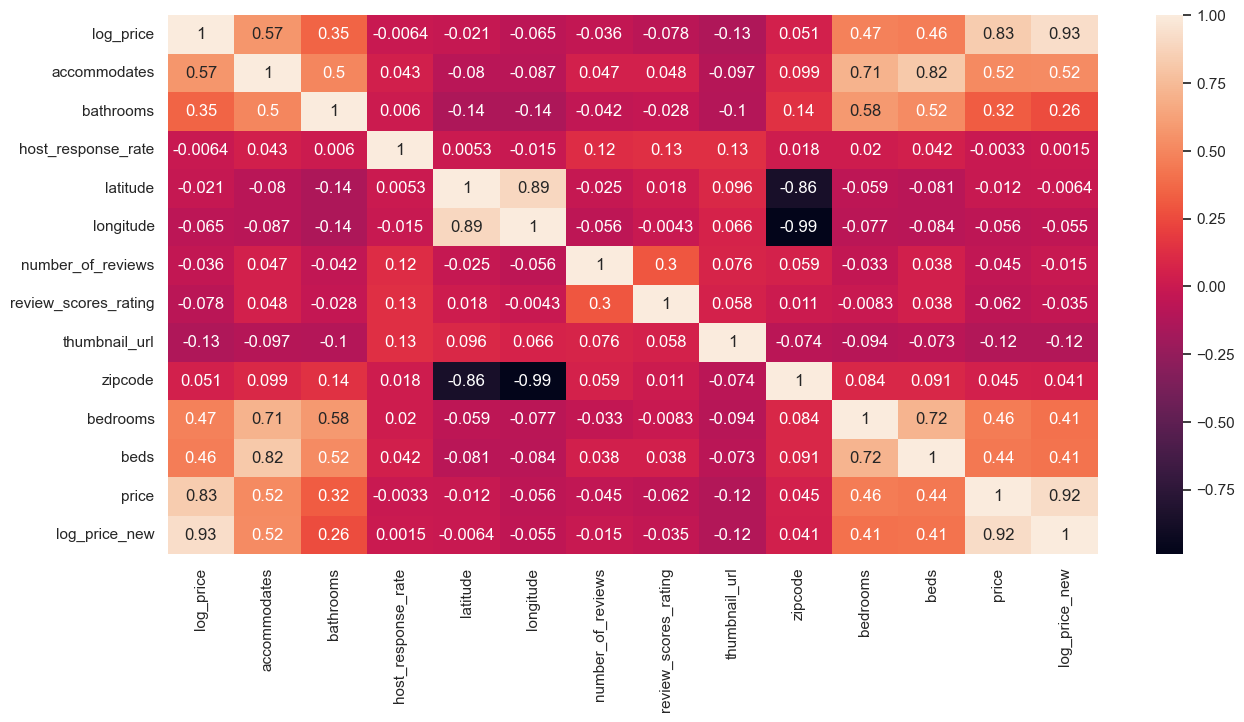

In [1546]:
# Correlation of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.set(font_scale=1.0)
plt.figure(figsize=(15,7))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

<a id = "13"></a><br>
## Accommodates -- Price

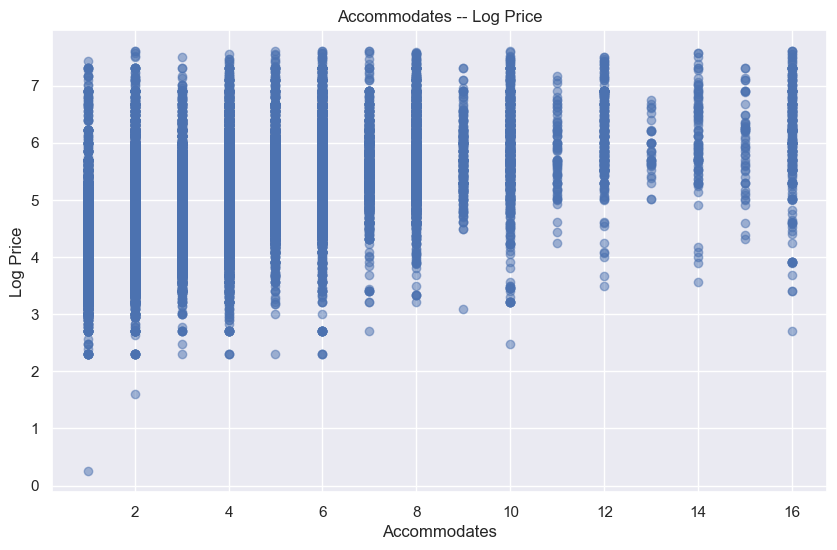

In [1547]:
# Showing the relationship between "accommodates" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['accommodates'], df['log_price'], alpha=0.5)
plt.xlabel('Accommodates')
plt.ylabel('Log Price')
plt.title('Accommodates -- Log Price')
plt.show()

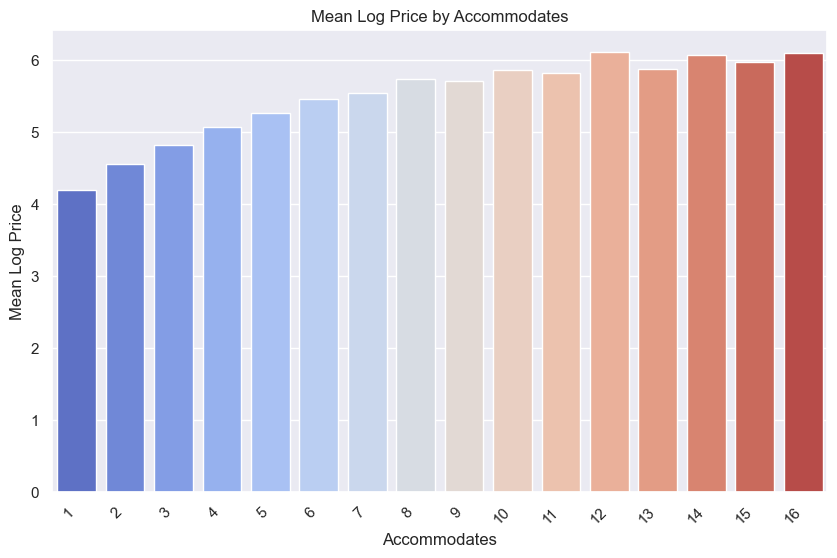

In [1548]:
# Let's divide the "accommodates" column into categorical groups and calculate the "log_price" averages. 
# In this way, we can better see the effect on the price.

grouped_data = df.groupby('accommodates')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data, palette='coolwarm')
plt.xlabel('Accommodates')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Accommodates')
plt.xticks(rotation=45, ha='right')
plt.show()

<a id = "14"></a><br>
## Bathrooms -- Price

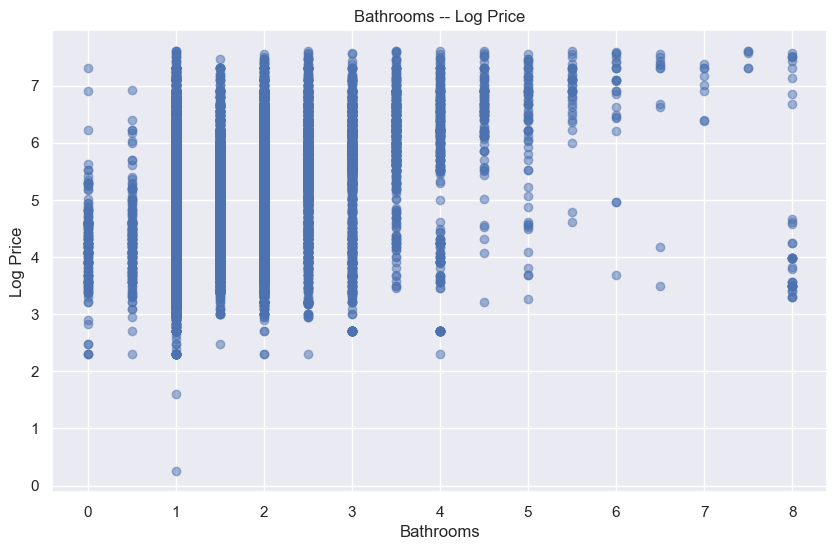

In [1549]:
# Showing the relationship between "bathrooms" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['bathrooms'], df['log_price'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')
plt.title('Bathrooms -- Log Price')
plt.show()

<a id = "15"></a><br>
## Number of Reviews -- Price

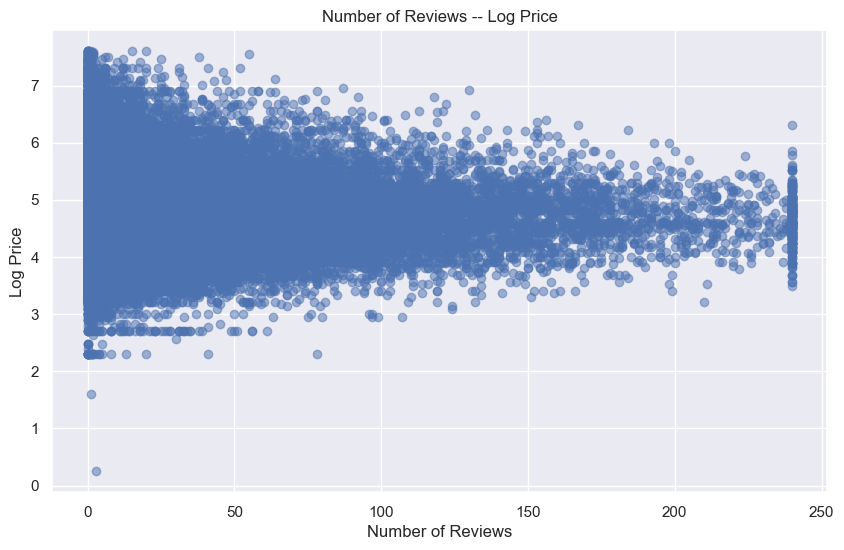

In [1550]:
# Showing the relationship between "number_of_reviews" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['log_price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Number of Reviews -- Log Price')
plt.show()


<a id = "16"></a><br>
## Review Scores Rating -- Price

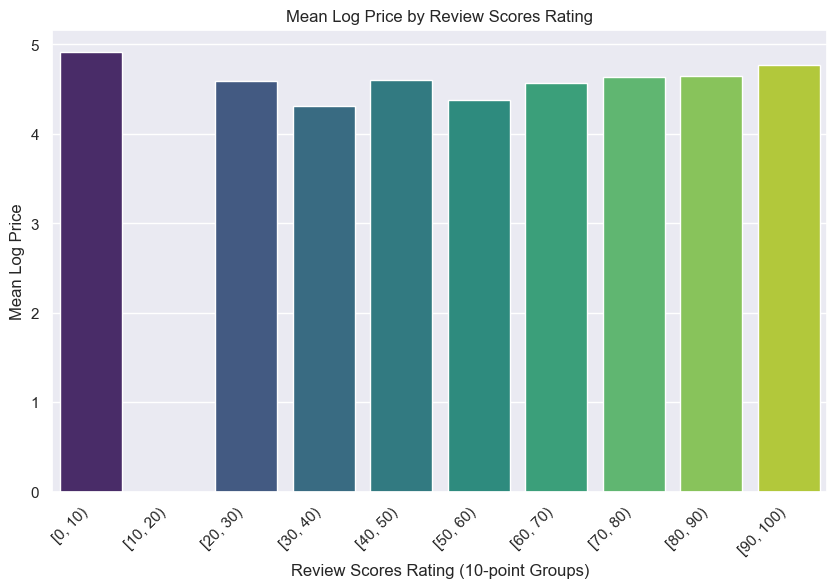

In [1551]:
# Divide the "review_scores_rating" values into 10 groups.Showing the relationship between "review_scores_group" and "log_price"

df['review_scores_group'] = pd.cut(df['review_scores_rating'], bins=range(0, 110, 10), right=False)
grouped_data = df.groupby('review_scores_group')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index.astype(str), y=grouped_data, palette='viridis')
plt.xlabel('Review Scores Rating (10-point Groups)')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Review Scores Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

<a id = "17"></a><br>
## Bedroom -- Price

<a id = "18"></a><br>
## Beds -- Price

7. <a id = "19"></a><br>
# Factorization of Categorical Columns

<a id = "20"></a><br>
## Propetty Type

In [1552]:
top_10_property_types = df['property_type'].value_counts().head(10).index.tolist()

# # Mark other values as "Other"
df['property_type'] = df['property_type'].apply(lambda x: x if x in top_10_property_types else 'Other')

# One-Hot Encoding 
df= pd.get_dummies(df,columns=['property_type'])

In [1553]:
property_types = df['cancellation_policy'].value_counts().head(3).index.tolist()

# Merge super_strict_30 and super_strict_60 with strict
df['cancellation_policy'] = df['cancellation_policy'].apply(lambda x: x if x in property_types else 'strict')

# One-Hot Encoding 
df= pd.get_dummies(df,columns=['cancellation_policy'])
 

<a id = "21"></a><br>
## Room Type - Bed Type  - City

In [1554]:
# Columns to one-hot encode
columns_to_encode = ["room_type", "bed_type", "city"]

# Apply one-hot encoding using a for loop
for col in columns_to_encode:
    df = pd.get_dummies(df, columns=[col])

<a id = "22"></a><br>
## Cleaning Fee - Host Profile Pic. - Host Identity Verified - Instant Bookable  

In [1555]:
df['cleaning_fee'] = df['cleaning_fee'].replace({False: 0, True: 1})
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 't': 0})
df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})

8. <a id = "23"></a><br>
# Feature Engineering

<a id = "24"></a><br>
## Amenities

In [1556]:
df['amenities'] = df['amenities'].map(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [1557]:
amenities = {x for xs in df['amenities'].tolist() for x in xs}
amenities.remove('')
amenities.remove('translation missing: en.hosting_amenity_49')
amenities.remove('translation missing: en.hosting_amenity_50')
amenities = list(amenities)

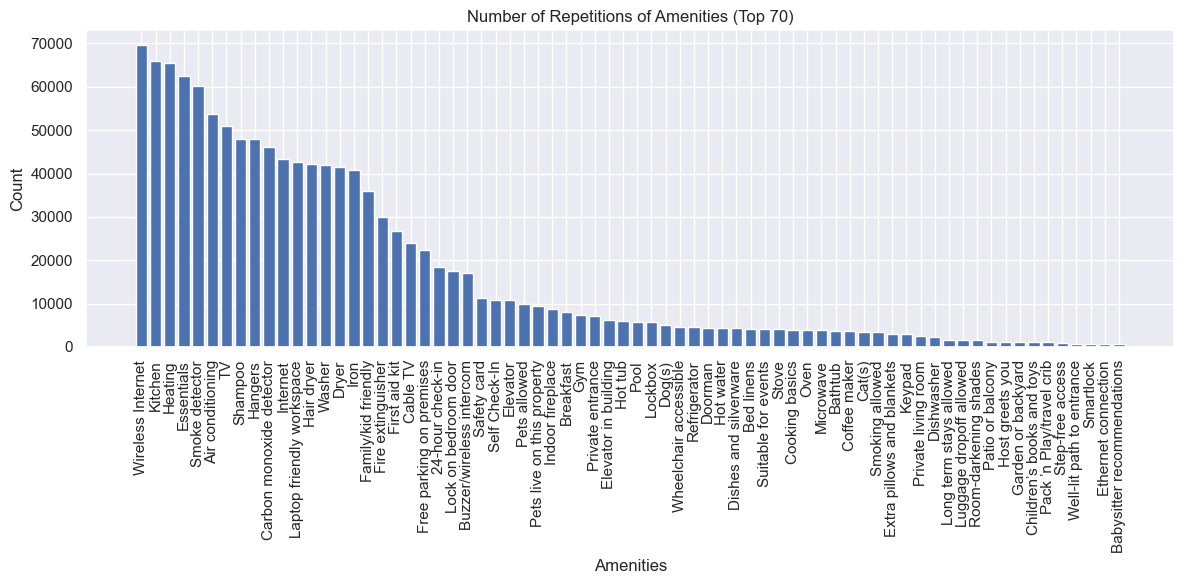

In [1558]:
# Count how many times each feature is passed
amenities_count = {amenity: df['amenities'].apply(lambda x: amenity in x).sum() for amenity in amenities}

# Let's sort the amenities_count by value from most to least
amenities_count_sorted = dict(sorted(amenities_count.items(), key=lambda item: item[1], reverse=True))

# Let's create the x and y values for the chart (in order)
x = list(amenities_count_sorted.keys())[:70]
y = list(amenities_count_sorted.values())[:70]

# Graph creation
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation=90)  
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Number of Repetitions of Amenities (Top 70)')
plt.tight_layout()
plt.show()

In [1559]:
#Converting the properties in the column into a table of 1 and 0 values.
amenities_df = pd.DataFrame(df['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(), columns=amenities, index=df.index)
amenities_df = amenities_df.astype(int)
amenities_df

,Window guards,Wide hallway clearance,Game console,Smoke detector,Carbon monoxide detector,Ethernet connection,Smoking allowed,Dishwasher,Patio or balcony,Luggage dropoff allowed,Lock on bedroom door,Dog(s),Stair gates,Kitchen,Hot water kettle,Baby monitor,Children’s books and toys,Flat,smooth pathway to front door,Private entrance,Fixed grab bars for shower & toilet,Washer / Dryer,Garden or backyard,Private bathroom,Long term stays allowed,Host greets you,Waterfront,Wide doorway,Bathtub with shower chair,Laptop friendly workspace,Firm matress,Toilet paper,Doorman Entry,Bath towel,Doorman,Keypad,Body soap,Free parking on premises,Oven,Internet,Babysitter recommendations,Handheld shower head,Smart lock,Outlet covers,Bed linens,Microwave,Stove,Air conditioning,Hot tub,Baby bath,Other pet(s),Bathtub,TV,Room-darkening shades,Single level home,EV charger,Wide entryway,Children’s dinnerware,Coffee maker,Cleaning before checkout,Changing table,Hair dryer,Wide clearance to shower and toilet,Cable TV,Hand or paper towel,Pets allowed,Pets live on this property,Self Check-In,Family/kid friendly,Free parking on street,Hangers,Buzzer/wireless intercom,Washer,Path to entrance lit at night,Crib,Fire extinguisher,Pool,Table corner guards,Step-free access,Private living room,Smartlock,Paid parking off premises,Shampoo,Cat(s),Wide clearance to shower & toilet,High chair,Roll-in shower with chair,24-hour check-in,Well-lit path to entrance,Hand soap,Wheelchair accessible,Suitable for events,Elevator in building,Lake access,Elevator,Grab-rails for shower and toilet,BBQ grill,Dishes and silverware,Beachfront,Breakfast,Ski in/Ski out,Ground floor access,Other,Indoor fireplace,Gym,Beach essentials,Heating,Air purifier,Disabled parking spot,First aid kit,Hot water,Wide clearance to bed,Firm mattress,Refrigerator,Essentials,Accessible-height bed,Dryer,Iron,Pack ’n Play/travel crib,Flat smooth pathway to front door,Accessible-height toilet,Wireless Internet,Pocket wifi,Cooking basics,Safety card,Fireplace guards,Extra pillows and blankets,Lockbox
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1560]:
# Take the number of values of each column, count the ones with value count 1 and sort them
value_counts_1 = amenities_df.apply(lambda col: col.value_counts().get(1, 0)).sort_values(ascending=False)

# Let's keep the first 25 columns and drop the remaining columns.
# When we examine the graph, we think that after this value will not affect our analysis.
selected_columns = value_counts_1.index[:24]
amenities_df = amenities_df[selected_columns]

amenities_df

,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom
0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1
3,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1
4,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74107,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,0
74108,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1
74109,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0


In [1561]:
df = pd.concat([df.drop(columns='amenities'), amenities_df], axis=1)
df.head()

,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,log_price_new,Zipcode,review_scores_group,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom
0,5.010635,3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,0,0.943841,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,1,11201.0,1.0,1.0,150.000000,5.017280,11201,NaN,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,5.129899,7,1.0,1,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,f,1.000000,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,1,10019.0,3.0,3.0,169.000000,5.135798,10019,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,4.976734,5,1.0,1,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,0,1.000000,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,1,10027.0,1.0,3.0,145.000000,4.983607,10037,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1
3,6.620073,4,1.0,1,This light-filled home-away-from-home is super...,2017-02-28,1.0,0,0.943841,2015-04-19,0,2017-09-14,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,1,94117.0,2.0,2.0,160.370849,5.083705,94115,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1
4,4.744932,2,1.0,1,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,0,1.000000,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009.0,0.0,1.0,115.000000,4.753590,20010,"[40.0, 50.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


<a id = "25"></a><br>
## Host Since

In [1562]:
# Filters empty values in column 'host_since'
filtered_since = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_since =  filtered_since[filtered_since['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_since[['first_review', 'host_has_profile_pic', 'host_identity_verified']]

In [1563]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_since.index)

Columns not to be feature engineered
beds - review_scores_rating - host_response_rate 

columns to drop
last_review - name

In [1564]:
df.head()

,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,log_price_new,Zipcode,review_scores_group,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom
0,5.010635,3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,0,0.943841,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,1,11201.0,1.0,1.0,150.000000,5.017280,11201,NaN,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1,5.129899,7,1.0,1,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,f,1.000000,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,1,10019.0,3.0,3.0,169.000000,5.135798,10019,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,4.976734,5,1.0,1,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,0,1.000000,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,1,10027.0,1.0,3.0,145.000000,4.983607,10037,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1
3,6.620073,4,1.0,1,This light-filled home-away-from-home is super...,2017-02-28,1.0,0,0.943841,2015-04-19,0,2017-09-14,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,1,94117.0,2.0,2.0,160.370849,5.083705,94115,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1
4,4.744932,2,1.0,1,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,0,1.000000,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009.0,0.0,1.0,115.000000,4.753590,20010,"[40.0, 50.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


<a id = "26"></a><br>
## Neighbourhood Level

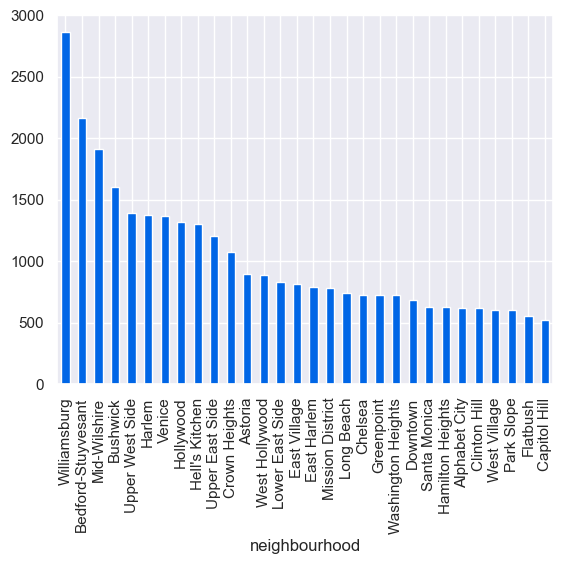

In [1565]:
# Adding price per room field (For neighnourhood price level)
df['price_per_room'] = (df.log_price) / (df.bedrooms)

df.neighbourhood.value_counts().head(30).plot.bar(color=(.0, 0.4, 0.9, 1))

neighbourhood_avg_price = df[['neighbourhood','price_per_room']].groupby('neighbourhood')['price_per_room'].mean().sort_values()



In [1566]:
neighbourhood_avg_price.replace(np.inf, np.nan,inplace=True)
neighbourhood_avg_price.fillna(neighbourhood_avg_price.mean(),inplace=True)

#print(neighbourhood_avg_price.sort_values(ascending=False))
#print('---------------------------------------')
#print(neighbourhood_avg_price.describe())

In [1567]:
neighbourhood_class_df = neighbourhood_avg_price.to_frame()
type(neighbourhood_class_df)

pandas.core.frame.DataFrame

In [1568]:

# Converting neighbourhoods to Levels
def neigbourhood_class(row):
  if row['price_per_room'] >=0 and row['price_per_room'] <= 3.631428:
    return 1
  elif row['price_per_room'] > 3.631428 and row['price_per_room'] <= 3.868928:
    return 2
  elif row['price_per_room'] >3.868928 and row['price_per_room'] <= 4.194452: 
    return 3
  else:
    return 4
  
df['neighbourhood_level'] = df.apply(neigbourhood_class,axis=1)

In [1569]:
df.sort_values(by='neighbourhood_level',ascending=True)

,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,log_price_new,Zipcode,review_scores_group,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,price_per_room,neighbourhood_level
60553,5.164786,7,2.0,1,"This 3 bedrooms’ luxury condo, hardwood floors...",2017-02-07,1.0,f,1.000000,2016-12-19,1,2017-09-25,40.700778,-73.926711,3-bedrooms Spacious Private Apt private backyard,Bushwick,21,90.0,1,11221.0,3.0,3.0,175.000000,5.170484,11237,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1.721595,1
54317,3.555348,1,1.0,1,Perfect crash pad over the holiday period. Ap...,2015-11-06,1.0,0,0.943841,2014-03-09,0,2017-04-29,40.713000,-73.941093,Williamsburg - Terrace apartment,Williamsburg,0,0.0,1,11211.0,1.0,1.0,35.000000,3.583519,11211,"[0.0, 10.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.555348,1
34621,5.181784,6,1.0,1,"My place is close to Brooklyn Bridge, Manhatta...",2016-10-10,1.0,f,0.943841,2013-01-17,0,2016-10-10,40.697521,-73.983230,DUMBO/DOWNTOWN BROOKLYN SPACIOUS DUPLEX,Downtown Brooklyn,1,100.0,1,11201.0,2.0,3.0,178.000000,5.187386,11240,NaN,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,2.590892,1
16472,6.907755,14,2.0,0,Great location two blocks from the Woodley Par...,2018-09-05,1.0,f,0.943841,2017-01-08,0,2016-10-23,38.925372,-77.050794,5BR/2BA house great for Inauguration/Women's M...,Woodley Park,0,0.0,1,20008.0,5.0,5.0,160.370849,5.083705,20009,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1.381551,1
16471,5.480639,4,1.0,1,Two bedrooms one bathroom and a big backyard a...,2018-06-15,1.0,f,1.000000,2016-10-16,1,2016-10-23,40.616640,-74.084853,Beautiful house in Staten Island,Stapleton,0,0.0,1,10304.0,2.0,2.0,240.000000,5.484797,10304,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,2.740319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31400,5.010635,2,1.0,0,"Prime area in West Hollywood, wal

In [1570]:
df.drop('price_per_room',axis=1,inplace=True)

In [1571]:
# Joining between the Main Data Frame and the  neighbourhood_class data frame to get neighbourhood class
#df = df.join(neighbourhood_class_df,on='neighbourhood')
#df = df.merge(neighbourhood_class_df,on='neighbourhood')

In [1572]:
df.head()

,log_price,accommodates,bathrooms,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price,log_price_new,Zipcode,review_scores_group,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,Wireless Internet,Kitchen,Heating,Essentials,Smoke detector,Air conditioning,TV,Shampoo,Hangers,Carbon monoxide detector,Internet,Laptop friendly workspace,Hair dryer,Washer,Dryer,Iron,Family/kid friendly,Fire extinguisher,First aid kit,Cable TV,Free parking on premises,24-hour check-in,Lock on bedroom door,Buzzer/wireless intercom,neighbourhood_level
0,5.010635,3,1.0,1,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,0,0.943841,2012-03-26,0,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,1,11201.0,1.0,1.0,150.000000,5.017280,11201,NaN,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,4
1,5.129899,7,1.0,1,Enjoy travelling during your stay in Manhattan...,2017-08-05,1.0,f,1.000000,2017-06-19,1,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,1,10019.0,3.0,3.0,169.000000,5.135798,10019,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1
2,4.976734,5,1.0,1,The Oasis comes complete with a full backyard ...,2017-04-30,1.0,0,1.000000,2016-10-25,1,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,1,10027.0,1.0,3.0,145.000000,4.983607,10037,"[90.0, 100.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,4
3,6.620073,4,1.0,1,This light-filled home-away-from-home is super...,2017-02-28,1.0,0,0.943841,2015-04-19,0,2017-09-14,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,1,94117.0,2.0,2.0,160.370849,5.083705,94115,"[0.0, 10.0)",False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1
4,4.744932,2,1.0,1,"Cool, cozy, and comfortable studio located in ...",2015-05-12,1.0,0,1.000000,2015-03-01,1,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009.0,0.0,1.0,115.000000,4.753590,20010,"[40.0, 50.0)",True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4


In [1573]:

# Step 1: Sorting neighbourhood values using value_counts()
neighbourhood_counts = df['neighbourhood'].value_counts().sort_values(ascending=False)

# Step 2: Calculating the minimum, maximum, and mean values of log_price for each neighbourhood
neighbourhood_stats = df.groupby('neighbourhood')['log_price'].agg(['min', 'max', 'mean'])

In [1574]:
neighbourhood_stats_sorted = neighbourhood_stats.loc[neighbourhood_counts.index]
print(neighbourhood_stats_sorted)

                         min       max      mean
neighbourhood                                   
Williamsburg        3.178054  7.313220  4.740027
Bedford-Stuyvesant  2.302585  7.207860  4.423185
Mid-Wilshire        2.302585  7.595890  4.671863
Bushwick            2.302585  6.907755  4.274465
Upper West Side     1.609438  7.313220  5.001347
...                      ...       ...       ...
New Dorp Beach      4.127134  4.127134  4.127134
Arboretum           4.234107  4.234107  4.234107
La Habra            4.317488  4.317488  4.317488
Printers Row        5.075174  5.075174  5.075174
Grant City          4.382027  4.382027  4.382027

[630 rows x 3 columns]


* Edit feature name

In [1575]:
df.rename(columns={'property_type_Bed & Breakfast': 'property_type_bed_break'}, inplace=True)
df.rename(columns={'room_type_Entire home/apt': 'room_type_entire_home'}, inplace=True)
df.rename(columns={'room_type_Private room': 'room_type_private_room'}, inplace=True)
df.rename(columns={'room_type_Shared room': 'room_type_shared_room'}, inplace=True)
df.rename(columns={'bed_type_Real Bed': 'bed_type_real_Bed'}, inplace=True)
df.rename(columns={'Wireless Internet': 'wireless_internet'}, inplace=True)
df.rename(columns={'Smoke detector': 'smoke_detector'}, inplace=True)
df.rename(columns={'Air conditioning': 'air_conditioning'}, inplace=True)
df.rename(columns={'Carbon monoxide detector': 'carbon_monoxide_detector'}, inplace=True)
df.rename(columns={'Laptop friendly workspace': 'laptop_friendly_workspace'}, inplace=True)
df.rename(columns={'Hair dryer': 'hair_dryer'}, inplace=True)
df.rename(columns={'Family/kid friendly': 'family_kid_friendly'}, inplace=True)
df.rename(columns={'Fire extinguisher': 'fire_extinguister'}, inplace=True)
df.rename(columns={'First aid kit': 'first_aid_kit'}, inplace=True)
df.rename(columns={'Cable TV': 'cable_tv'}, inplace=True)
df.rename(columns={'Free parking on premises': 'free_parking_on_premises'}, inplace=True)
df.rename(columns={'24-hour check-in': 'alltime_check_in'}, inplace=True)
df.rename(columns={'Lock on bedroom door': 'lock_on_bedroom_door'}, inplace=True)
df.rename(columns={'Buzzer/wireless intercom': 'buzzer_wireless,intercom'}, inplace=True)
df.rename(columns={'bed_type_Pull-out Sofa': 'bed_type_Pull_out_Sofa'}, inplace=True)



In [1576]:
def true_false_to_binary(val):
    if val == True:
        return 1
    elif val == False:
        return 0
    else:
        return val  # If val is not "True" or "False", return value as is

# Make "True" and "False" values 1 and 0 by applying the function to the corresponding columns of the data frame
binary_cols = ['property_type_Apartment','property_type_bed_break','property_type_Bungalow','property_type_Condominium','property_type_Dorm','property_type_Guesthouse','property_type_House','property_type_Loft','property_type_Other','property_type_Townhouse','cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict','room_type_entire_home','room_type_private_room','room_type_shared_room','bed_type_Airbed','bed_type_Couch','bed_type_Futon','bed_type_Pull_out_Sofa','bed_type_real_Bed','city_Boston','city_Chicago','city_DC','city_LA','city_NYC','city_SF']
df[binary_cols] = df[binary_cols].applymap(true_false_to_binary)




In [1578]:
columns_to_drop = ['host_has_profile_pic','host_identity_verified','latitude','longitude', 'name','price','last_review','first_review',"review_scores_group",'description','neighbourhood','zipcode','Zipcode','host_since']
df = df.drop(columns=columns_to_drop)


In [1582]:
df.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,log_price_new,property_type_Apartment,property_type_bed_break,property_type_Bungalow,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire_home,room_type_private_room,room_type_shared_room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull_out_Sofa,bed_type_real_Bed,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,wireless_internet,Kitchen,Heating,Essentials,smoke_detector,air_conditioning,TV,Shampoo,Hangers,carbon_monoxide_detector,Internet,laptop_friendly_workspace,hair_dryer,Washer,Dryer,Iron,family_kid_friendly,fire_extinguister,first_aid_kit,cable_tv,free_parking_on_premises,alltime_check_in,lock_on_bedroom_door,"buzzer_wireless,intercom",neighbourhood_level
0,5.010635,3,1.0,1,0.943841,0,2,100.0,1,1.0,1.0,5.017280,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,4
1,5.129899,7,1.0,1,1.000000,1,6,93.0,1,3.0,3.0,5.135798,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1
2,4.976734,5,1.0,1,1.000000,1,10,92.0,1,1.0,3.0,4.983607,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,1,4
3,6.620073,4,1.0,1,0.943841,0,0,0.0,1,2.0,2.0,5.083705,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1
4,4.744932,2,1.0,1,1.000000,1,4,40.0,0,0.0,1.0,4.753590,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4


# Feature Selection

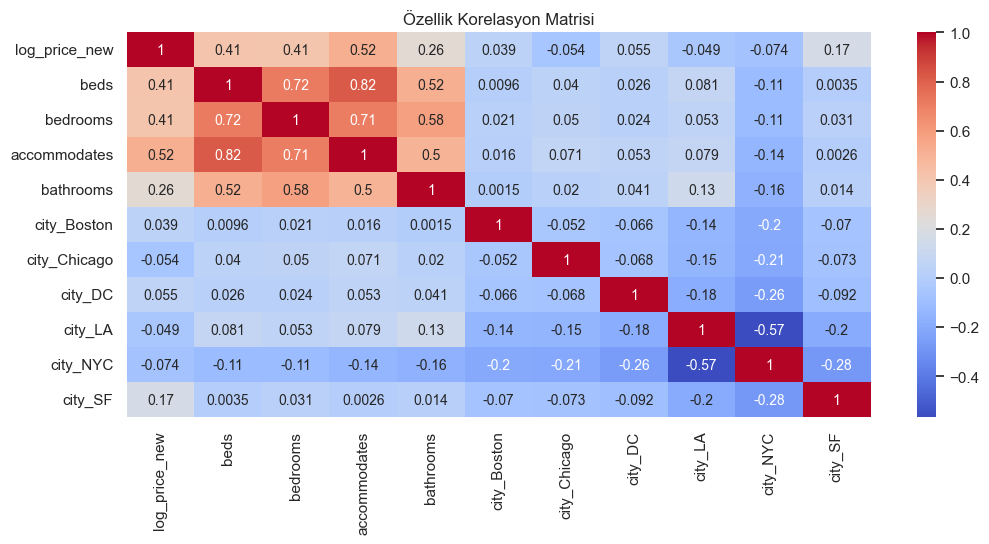

In [130]:
# Correlation of numerical columns
selected_columns = ['log_price_new','beds', 'bedrooms', 'accommodates', 'bathrooms','city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF']
selected_df = df[selected_columns]


corr_matrix = selected_df.corr()

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Özellik Korelasyon Matrisi')
plt.show()

In [117]:
df.to_csv('data_final.csv',index=False)

# RFE 

In [146]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Split data 
X = df.drop(columns=['log_price','log_price_new'])  # "target" 
y = df['log_price_new']

# select feature and feature count with RFE 
model = LinearRegression()
rfe = RFE(model, n_features_to_select=35)  
X_rfe = rfe.fit_transform(X, y)

# Show Feature index 
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(selected_features[selected_features['Selected'] == True])

                         Feature  Selected  Ranking
3             host_response_rate      True        1
7                  thumbnail_url      True        1
8                       bedrooms      True        1
10       property_type_Apartment      True        1
11       property_type_bed_break      True        1
12        property_type_Bungalow      True        1
13     property_type_Condominium      True        1
14            property_type_Dorm      True        1
15      property_type_Guesthouse      True        1
16           property_type_House      True        1
17            property_type_Loft      True        1
18           property_type_Other      True        1
19       property_type_Townhouse      True        1
20  cancellation_policy_flexible      True        1
21  cancellation_policy_moderate      True        1
22    cancellation_policy_strict      True        1
23         room_type_entire_home      True        1
24        room_type_private_room      True        1
25         r

8. <a id = "27"></a><br>
# Modeling

<a id = "28"></a><br>
## Load Final Data

In [132]:
df_final = pd.read_csv("data_final.csv")

<a id = "29"></a><br>
## Split Data

In [133]:

X = df_final.drop(['log_price_new','log_price'], axis=1)
y = df_final['log_price_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 48349
X_test 23814
y_train 48349
y_test 23814


## XGBOOST Extreme Gradient Boosting

In [131]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Build and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Evaluate error metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 - Score:", r2)

Mean Squared Error: 0.1333804087136698
R2 - Score: 0.7364906103794964


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor


# Creating the XGBoost classifier model
xgb_model = XGBRegressor()

param_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
}

# Step to find the best parameters with Grid Search and cross validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Best params
best_params = grid_search.best_params_
print("Best params:", best_params)





In [134]:
# Evaluate on test data using the best model
best_model = grid_search.best_estimator_
r2 = best_model.score(X_test, y_test)
print("r2_scoring:", r2)

r2_scoring: 0.7200176261704785


<a id = "30"></a><br>
## Linear Regressor

In [1590]:

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.3143650414597083

Mean Squarred Error of Linear Regression     :  0.1711264297114603

Root Mean Squarred Error of Linear Regression:  0.4136743039052103

R2 Score of Linear Regression                :  0.5767662888688927


<a id = "31"></a><br>
## Random Forest Regressor

In [1591]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.25230492959554246

Mean Squarred Error of Random Forest Regressor     :  0.11865808648301676

Root Mean Squarred Error of Random Forest Regressor:  0.34446783083913185

R2 Score of Random Forest Regressor                :  0.7065321681601131


<a id = "32"></a><br>
## Cat Boost Regressor

In [1592]:
model_CBR = CatBoostRegressor()

model_CBR.fit(X_train, y_train)

cross_val_score(model_CBR, X_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(X_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.075564
0:	learn: 0.6067965	total: 792ms	remaining: 13m 10s
1:	learn: 0.5791860	total: 868ms	remaining: 7m 13s
2:	learn: 0.5556392	total: 929ms	remaining: 5m 8s
3:	learn: 0.5337286	total: 977ms	remaining: 4m 3s
4:	learn: 0.5141605	total: 1.06s	remaining: 3m 31s
5:	learn: 0.4962870	total: 1.12s	remaining: 3m 5s
6:	learn: 0.4805741	total: 1.17s	remaining: 2m 45s
7:	learn: 0.4670934	total: 1.22s	remaining: 2m 30s
8:	learn: 0.4548964	total: 1.28s	remaining: 2m 20s
9:	learn: 0.4441240	total: 1.31s	remaining: 2m 10s
10:	learn: 0.4345089	total: 1.34s	remaining: 2m
11:	learn: 0.4257592	total: 1.43s	remaining: 1m 57s
12:	learn: 0.4179946	total: 1.47s	remaining: 1m 51s
13:	learn: 0.4111540	total: 1.5s	remaining: 1m 45s
14:	learn: 0.4051093	total: 1.52s	remaining: 1m 40s
15:	learn: 0.3998509	total: 1.56s	remaining: 1m 35s
16:	learn: 0.3952480	total: 1.61s	remaining: 1m 33s
17:	learn: 0.3912095	total: 1.62s	remaining: 1m 28s
18:	learn: 0.3874243	total: 1.64s	remaining: 1m 24s

<a id = "33"></a><br>
## Gradient Boosting Regressor

In [1593]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.26003593258879754

Mean Squarred Error of Gradient Boosting     :  0.12294220776823207

Root Mean Squarred Error of Gradient Boosting:  0.35063115629993874

R2 Score of Gradient Boosting                :  0.6959365836350653


<a id = "34"></a><br>
## XGB Regressor

In [136]:
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2504540991700077

Mean Squarred Error of XGBoost Regressor     :  0.11550323864935046

Root Mean Squarred Error of XGBoost Regressor:  0.33985767410689793

R2 Score of XGBoost Regressor                :  0.7143348083422749


<a id = "35"></a><br>
## Model Comparision

In [137]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,        
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}

In [138]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [139]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.615475,0.327490,0.194635,0.441174
Random Forest,0.723208,0.265450,0.140104,0.374304
CatBoost,0.745540,0.256744,0.128800,0.358887
Gradient Boosting,0.711690,0.274197,0.145934,0.382013
XGBoost,0.714335,0.250454,0.115503,0.339858


# Price Comparision 

In [144]:
price_compare_lr = pd.DataFrame({"lr_real_y": np.exp(y[0:7]),
                    "lr_predict_y": np.exp(lr.predict(X)[0:7])})

price_compare_rf = pd.DataFrame({"rf_real_y": np.exp(y[0:7]),
                    "rf_predict_y": np.exp(rf.predict(X)[0:7])})

price_compare_gb = pd.DataFrame({"gb_real_y": np.exp(y[0:7]),
                    "gb_predict_y": np.exp(gb.predict(X)[0:7])})

price_compare_xgb = pd.DataFrame({"xgb_real_y": np.exp(y[0:7]),
                    "xgb_predict_y": np.exp(xgb.predict(X)[0:7])})

In [145]:
org = pd.concat([price_compare_lr, price_compare_rf, price_compare_gb,price_compare_xgb ], axis=1)
org

,lr_real_y,lr_predict_y,rf_real_y,rf_predict_y,gb_real_y,gb_predict_y,xgb_real_y,xgb_predict_y
0,151.000000,156.212211,151.000000,138.091009,151.000000,135.713990,151.000000,136.151184
1,170.000000,240.756399,170.000000,187.617019,170.000000,220.259812,170.000000,242.742462
2,146.000000,194.689027,146.000000,149.234547,146.000000,158.671254,146.000000,168.405258
3,161.370849,262.687296,161.370849,626.891269,161.370849,369.980621,161.370849,272.425629
4,116.000000,115.278636,116.000000,192.172002,116.000000,117.490365,116.000000,104.844940
5,86.000000,98.955009,86.000000,95.004887,86.000000,115.753933,86.000000,111.979584
6,84.000000,141.499612,84.000000,110.523256,84.000000,113.539474,84.000000,115.187645


<a id = "36"></a><br>
## Metrics Comparision Graphic

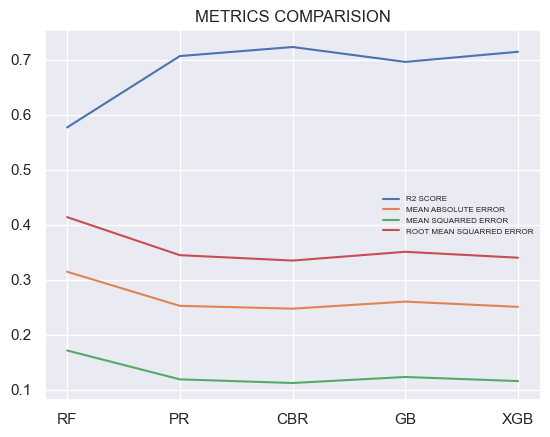

In [1603]:
alg = ['RF','PR','CBR','GB','XGB']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]
#plot(lambda x: x ** 3 - (1 / x))
plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

# Feature Importance

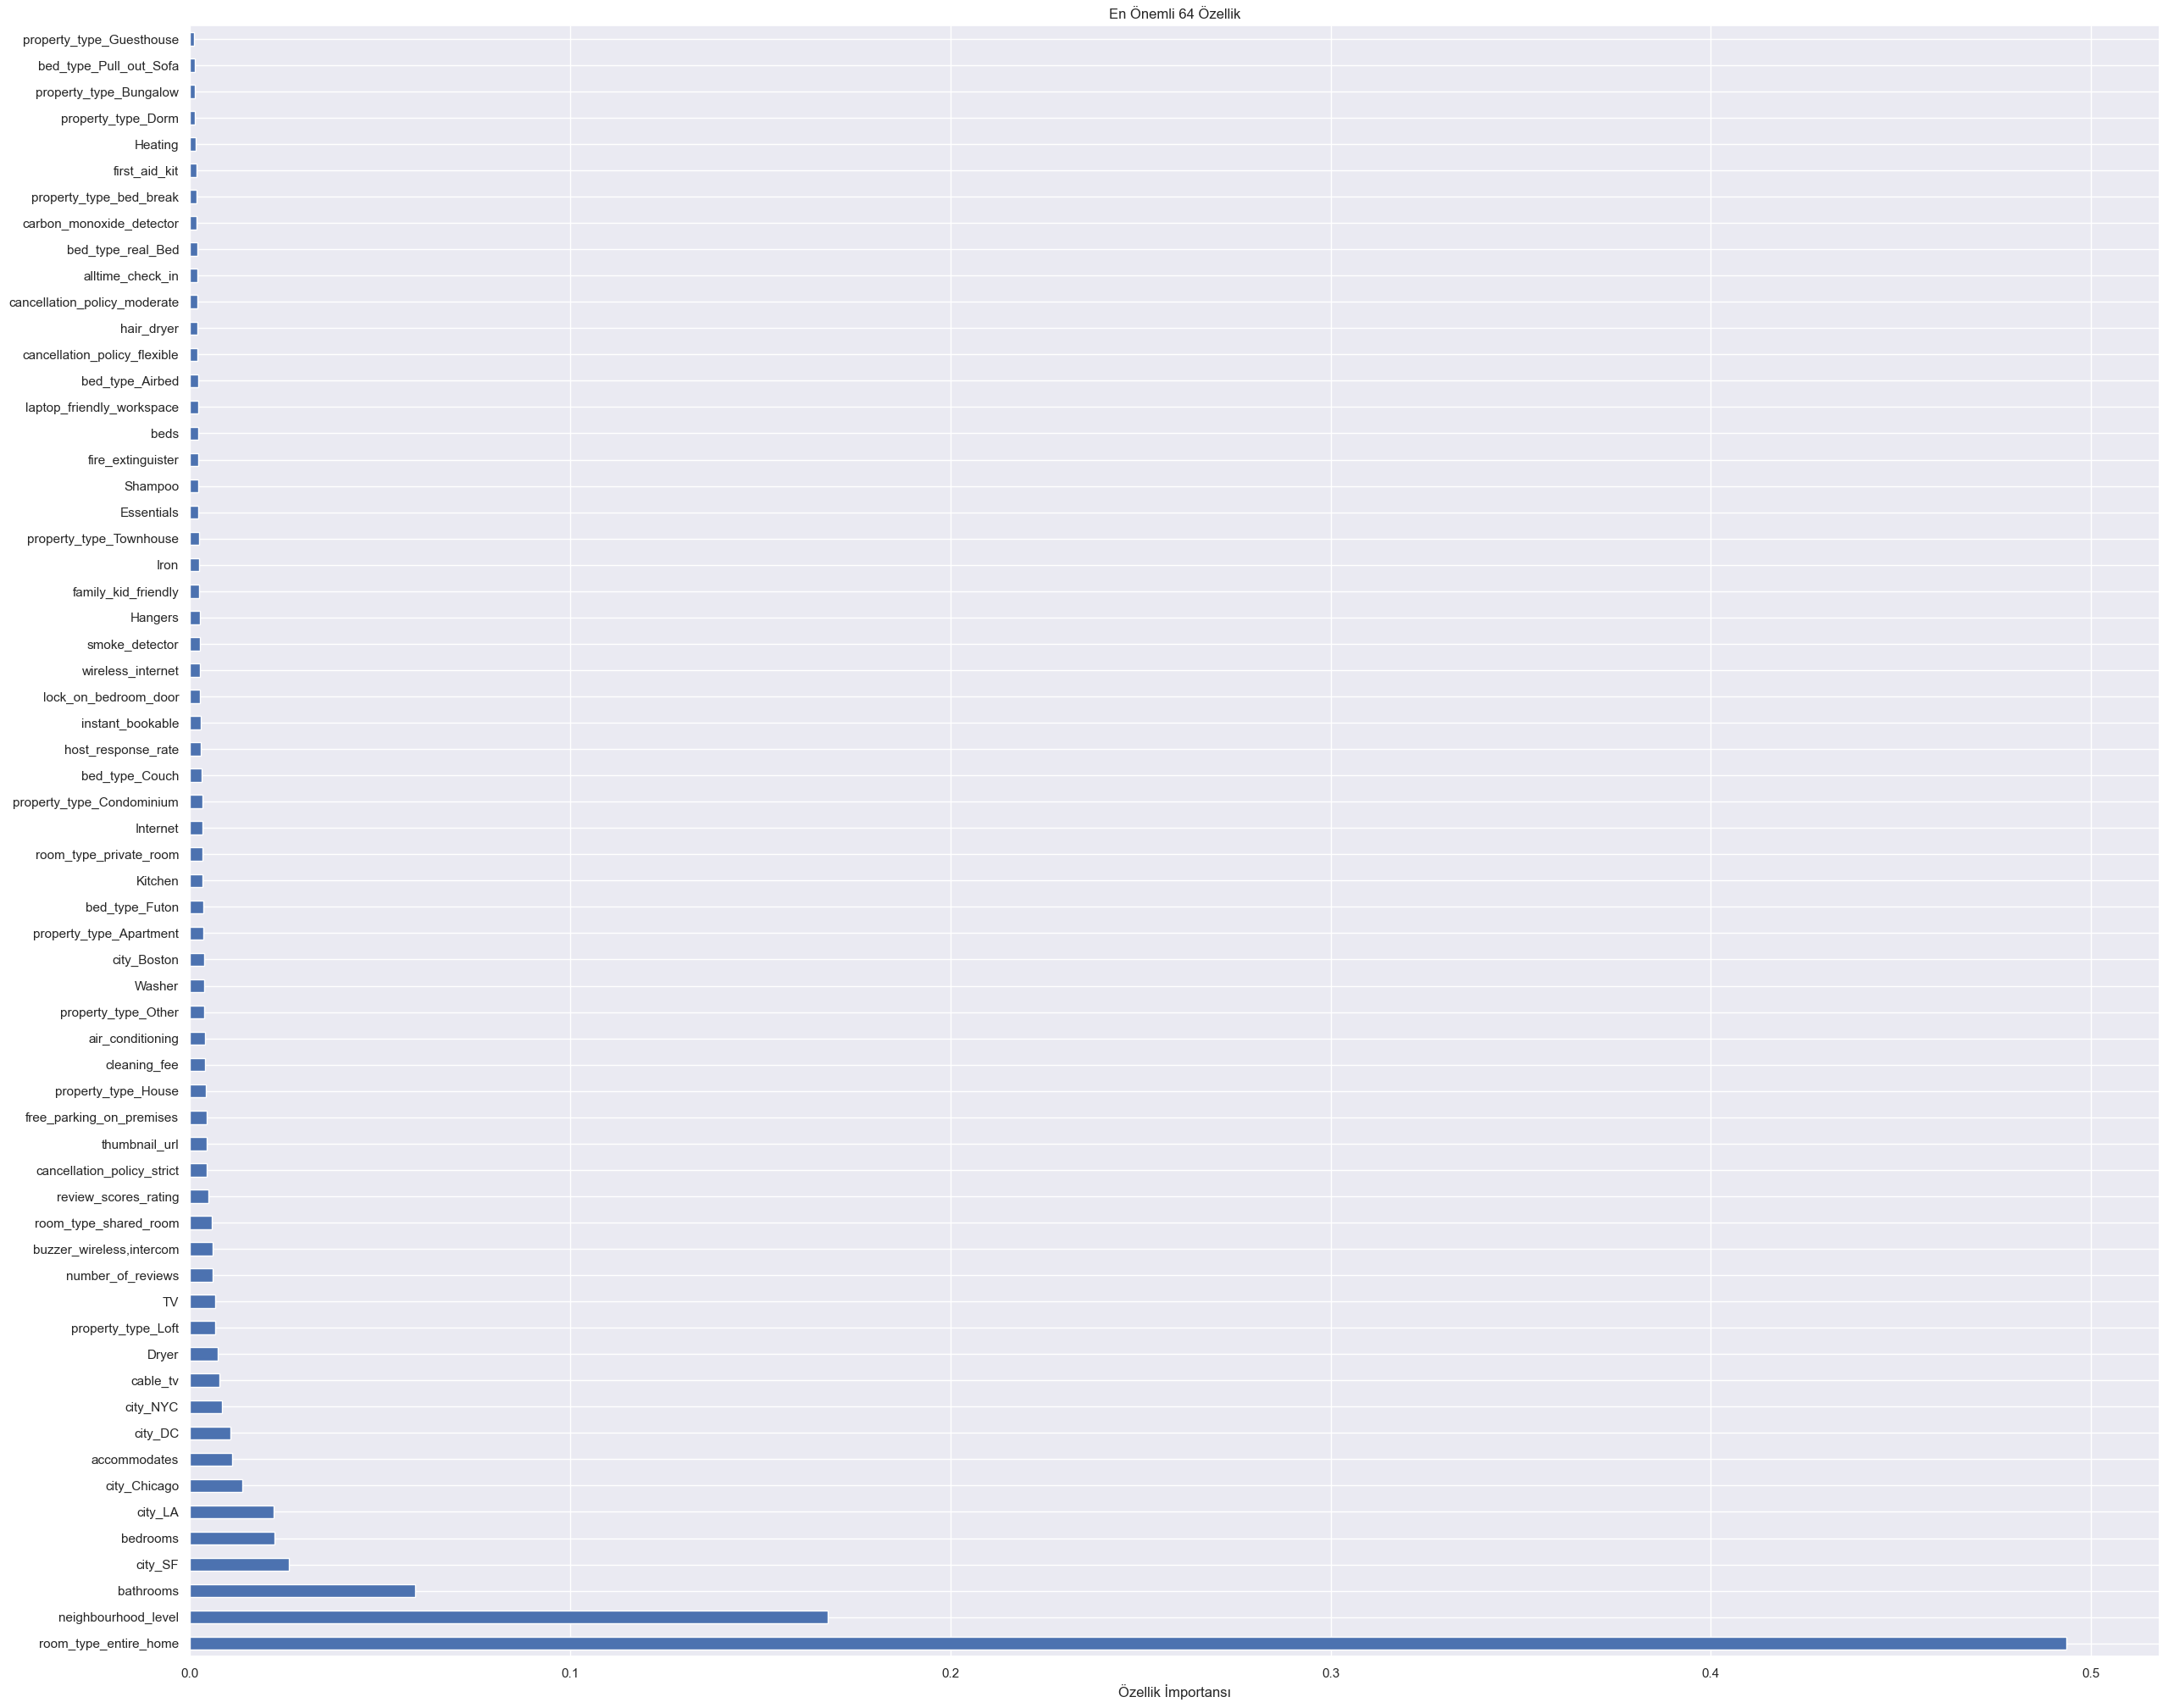

In [118]:
# XGBoost regresyon modelini oluşturma ve eğitme
model = xgb.XGBRegressor()
model.fit(X, y)

# Özellik importansını görselleştirme
plt.figure(figsize=(30,25))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(64).plot(kind='barh')

plt.xlabel('Özellik İmportansı')
plt.title('En Önemli 64 Özellik')
plt.show()



Learning rate set to 0.0805
0:	learn: 0.6786605	total: 148ms	remaining: 2m 27s
1:	learn: 0.6468955	total: 182ms	remaining: 1m 30s
2:	learn: 0.6194571	total: 204ms	remaining: 1m 7s
3:	learn: 0.5941426	total: 225ms	remaining: 56s
4:	learn: 0.5718508	total: 248ms	remaining: 49.4s
5:	learn: 0.5519743	total: 267ms	remaining: 44.2s
6:	learn: 0.5342361	total: 291ms	remaining: 41.3s
7:	learn: 0.5186663	total: 310ms	remaining: 38.5s
8:	learn: 0.5049979	total: 383ms	remaining: 42.2s
9:	learn: 0.4927777	total: 420ms	remaining: 41.5s
10:	learn: 0.4819898	total: 446ms	remaining: 40.1s
11:	learn: 0.4725353	total: 466ms	remaining: 38.3s
12:	learn: 0.4640614	total: 491ms	remaining: 37.3s
13:	learn: 0.4563519	total: 510ms	remaining: 35.9s
14:	learn: 0.4496126	total: 529ms	remaining: 34.8s
15:	learn: 0.4436647	total: 549ms	remaining: 33.8s
16:	learn: 0.4384555	total: 569ms	remaining: 32.9s
17:	learn: 0.4337172	total: 588ms	remaining: 32.1s
18:	learn: 0.4296618	total: 608ms	remaining: 31.4s
19:	learn: 0.

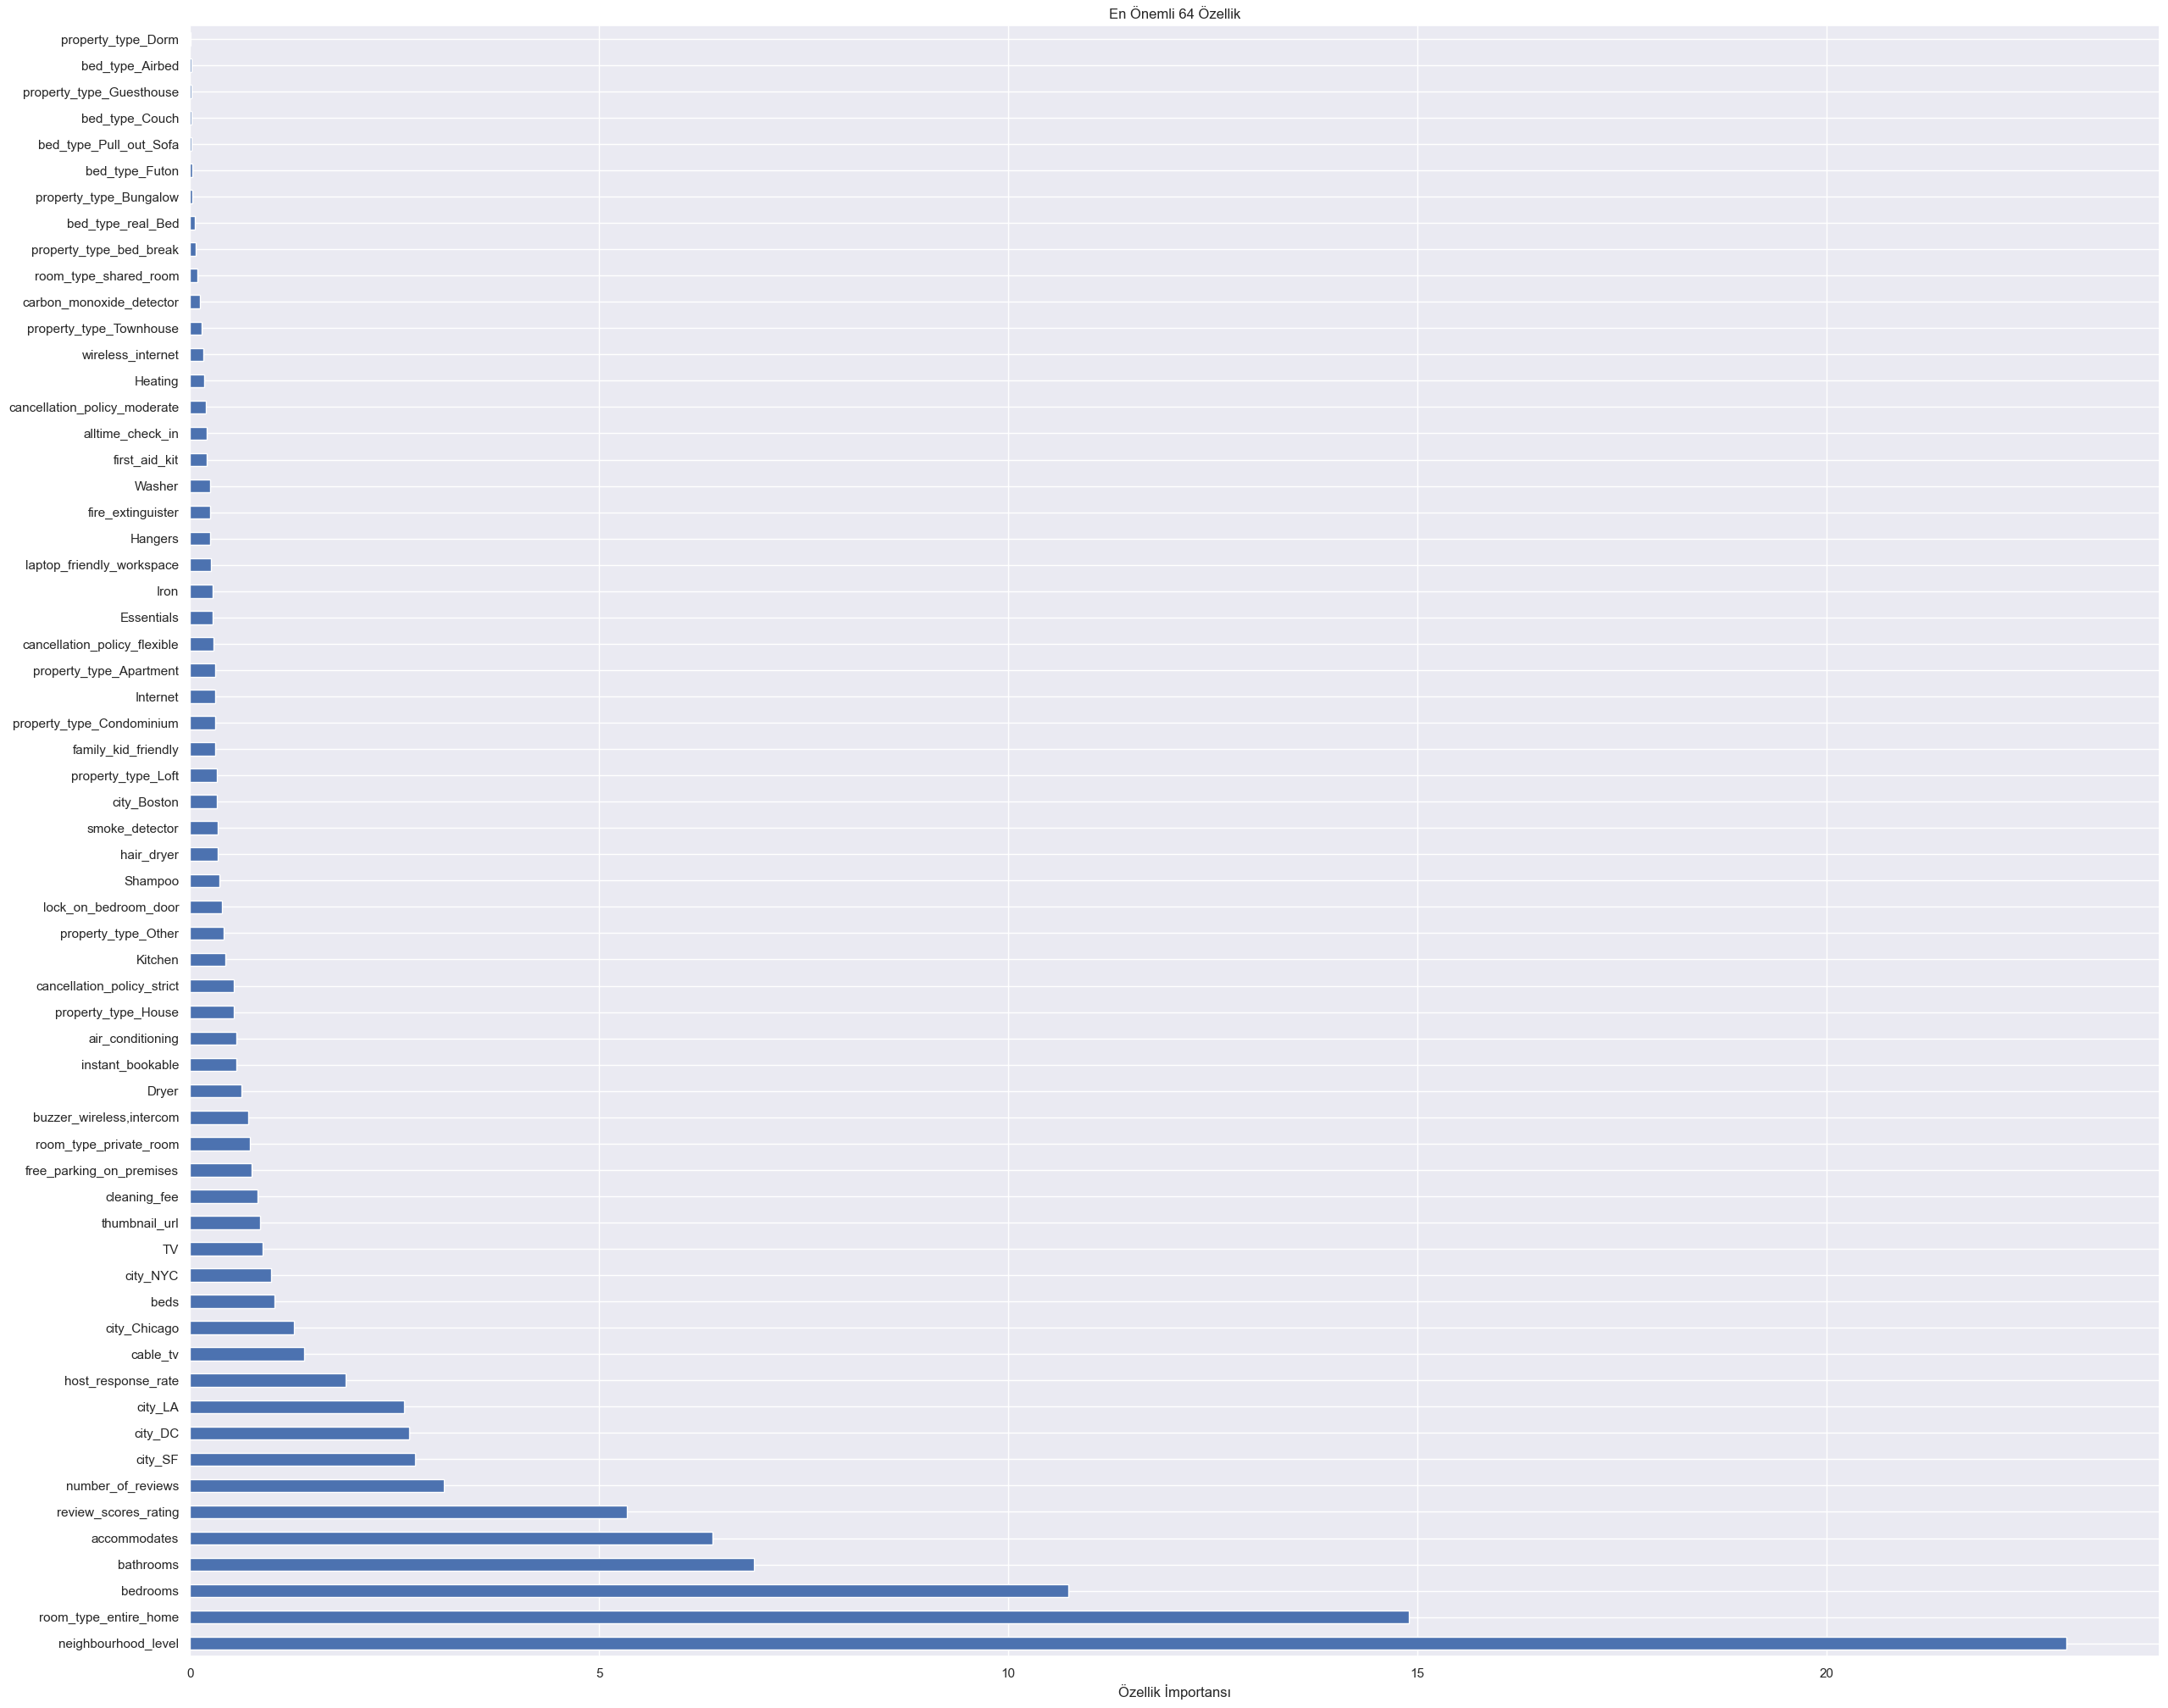

In [120]:
# XGBoost regresyon modelini oluşturma ve eğitme
model = CatBoostRegressor()
model.fit(X, y)

# Özellik importansını görselleştirme
plt.figure(figsize=(30,25))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(64).plot(kind='barh')

plt.xlabel('Özellik İmportansı')
plt.title('En Önemli 64 Özellik')
plt.show()
